In [1]:
import numpy  as np
import pandas as pd
import json
import pandas

In [2]:
import nltk
import nltk.corpus
from sklearn.feature_extraction.text  import TfidfVectorizer
from sklearn.metrics                  import silhouette_samples, silhouette_score
from sklearn.preprocessing            import normalize
from nltk.tokenize                    import word_tokenize
import re
from unidecode                        import unidecode
from nltk.corpus import stopwords

In [3]:
import matplotlib.pyplot  as plt
import matplotlib.cm      as cm
import seaborn            as sns
from sklearn.metrics                  import silhouette_samples, silhouette_score
from wordcloud                        import WordCloud

In [4]:
from sklearn import cluster

In [5]:
Neemias_1  = "The words of Nehemiah the son of Hachaliah. And it came to pass in the month Chisleu, in the twentieth year, as I was in Shushan the palace,That Hanani, one of my brothers, came, he and certain men of Judah; and I asked them concerning the Jews that had escaped, which were left of the captivity, and concerning Jerusalem.And they said to me, The remnant that are left of the captivity there in the province are in great affliction and reproach: the wall of Jerusalem also is broken down, and the gates thereof are burned with fire.And it came to pass, when I heard these words, that I sat down and wept, and mourned certain days, and fasted, and prayed before the God of heaven,And said, I beseech you, O LORD God of heaven, the great and terrible God, that keeps covenant and mercy for them that love him and observe his commandments:Let your ear now be attentive, and your eyes open, that you may hear the prayer of your servant, which I pray before you now, day and night, for the children of Israel your servants, and confess the sins of the children of Israel, which we have sinned against you: both I and my father' house have sinned.We have dealt very corruptly against you, and have not kept the commandments, nor the statutes, nor the judgments, which you commanded your servant Moses.Remember, I beseech you, the word that you commanded your servant Moses, saying, If you transgress, I will scatter you abroad among the nations:But if you turn to me, and keep my commandments, and do them; though there were of you cast out to the uttermost part of the heaven, yet will I gather them from there, and will bring them to the place that I have chosen to set my name there.Now these are your servants and your people, whom you have redeemed by your great power, and by your strong hand.O LORD, I beseech you, let now your ear be attentive to the prayer of your servant, and to the prayer of your servants, who desire to fear your name: and prosper, I pray you, your servant this day, and grant him mercy in the sight of this man. For I was the king' cupbearer.".lower()

In [6]:
Neemias_2 = "And it came to pass in the month Nisan, in the twentieth year of Artaxerxes the king, that wine was before him: and I took up the wine, and gave it to the king. Now I had not been beforetime sad in his presence.Why the king said to me, Why is your countenance sad, seeing you are not sick? this is nothing else but sorrow of heart. Then I was very sore afraid,And said to the king, Let the king live for ever: why should not my countenance be sad, when the city, the place of my fathers'sepulchers, lies waste, and the gates thereof are consumed with fire?Then the king said to me, For what do you make request? So I prayed to the God of heaven.And I said to the king, If it please the king, and if your servant have found favor in your sight, that you would send me to Judah, to the city of my fathers'sepulchers, that I may build it.And the king said to me, (the queen also sitting by him,) For how long shall your journey be? and when will you return? So it pleased the king to send me; and I set him a time.Moreover I said to the king, If it please the king, let letters be given me to the governors beyond the river, that they may convey me over till I come into Judah;And a letter to Asaph the keeper of the king' forest, that he may give me timber to make beams for the gates of the palace which appertained to the house, and for the wall of the city, and for the house that I shall enter into. And the king granted me, according to the good hand of my God on me.Then I came to the governors beyond the river, and gave them the king' letters. Now the king had sent captains of the army and horsemen with me.When Sanballat the Horonite, and Tobiah the servant, the Ammonite, heard of it, it grieved them exceedingly that there was come a man to seek the welfare of the children of Israel.So I came to Jerusalem, and was there three days.And I arose in the night, I and some few men with me; neither told I any man what my God had put in my heart to do at Jerusalem: neither was there any beast with me, save the beast that I rode on.And I went out by night by the gate of the valley, even before the dragon well, and to the dung port, and viewed the walls of Jerusalem, which were broken down, and the gates thereof were consumed with fire.Then I went on to the gate of the fountain, and to the king' pool: but there was no place for the beast that was under me to pass.Then went I up in the night by the brook, and viewed the wall, and turned back, and entered by the gate of the valley, and so returned.And the rulers knew not where I went, or what I did; neither had I as yet told it to the Jews, nor to the priests, nor to the nobles, nor to the rulers, nor to the rest that did the work.Then said I to them, You see the distress that we are in, how Jerusalem lies waste, and the gates thereof are burned with fire: come, and let us build up the wall of Jerusalem, that we be no more a reproach.Then I told them of the hand of my God which was good on me; as also the king' words that he had spoken to me. And they said, Let us rise up and build. So they strengthened their hands for this good work.But when Sanballat the Horonite, and Tobiah the servant, the Ammonite, and Geshem the Arabian, heard it, they laughed us to scorn, and despised us, and said, What is this thing that you do? will you rebel against the king?Then answered I them, and said to them, The God of heaven, he will prosper us; therefore we his servants will arise and build: but you have no portion, nor right, nor memorial, in Jerusalem.".lower()

In [10]:
Neemias_3 = "Then Eliashib the high priest rose up with his brothers the priests, and they built the sheep gate; they sanctified it, and set up the doors of it; even to the tower of Meah they sanctified it, to the tower of Hananeel.And next to him built the men of Jericho. And next to them built Zaccur the son of Imri.But the fish gate did the sons of Hassenaah build, who also laid the beams thereof, and set up the doors thereof, the locks thereof, and the bars thereof.And next to them repaired Meremoth the son of Urijah, the son of Koz. And next to them repaired Meshullam the son of Berechiah, the son of Meshezabeel. And next to them repaired Zadok the son of Baana.And next to them the Tekoites repaired; but their nobles put not their necks to the work of their LORD.Moreover the old gate repaired Jehoiada the son of Paseah, and Meshullam the son of Besodeiah; they laid the beams thereof, and set up the doors thereof, and the locks thereof, and the bars thereof.And next to them repaired Melatiah the Gibeonite, and Jadon the Meronothite, the men of Gibeon, and of Mizpah, to the throne of the governor on this side the river.Next to him repaired Uzziel the son of Harhaiah, of the goldsmiths. Next to him also repaired Hananiah the son of one of the apothecaries, and they fortified Jerusalem to the broad wall.And next to them repaired Rephaiah the son of Hur, the ruler of the half part of Jerusalem.And next to them repaired Jedaiah the son of Harumaph, even over against his house. And next to him repaired Hattush the son of Hashabniah.Malchijah the son of Harim, and Hashub the son of Pahathmoab, repaired the other piece, and the tower of the furnaces.And next to him repaired Shallum the son of Halohesh, the ruler of the half part of Jerusalem, he and his daughters.The valley gate repaired Hanun, and the inhabitants of Zanoah; they built it, and set up the doors thereof, the locks thereof, and the bars thereof, and a thousand cubits on the wall to the dung gate.But the dung gate repaired Malchiah the son of Rechab, the ruler of part of Bethhaccerem; he built it, and set up the doors thereof, the locks thereof, and the bars thereof.But the gate of the fountain repaired Shallun the son of Colhozeh, the ruler of part of Mizpah; he built it, and covered it, and set up the doors thereof, the locks thereof, and the bars thereof, and the wall of the pool of Siloah by the king' garden, and to the stairs that go down from the city of David.After him repaired Nehemiah the son of Azbuk, the ruler of the half part of Bethzur, to the place over against the sepulchers of David, and to the pool that was made, and to the house of the mighty.After him repaired the Levites, Rehum the son of Bani. Next to him repaired Hashabiah, the ruler of the half part of Keilah, in his part.After him repaired their brothers, Bavai the son of Henadad, the ruler of the half part of Keilah.And next to him repaired Ezer the son of Jeshua, the ruler of Mizpah, another piece over against the going up to the armory at the turning of the wall.After him Baruch the son of Zabbai earnestly repaired the other piece, from the turning of the wall to the door of the house of Eliashib the high priest.After him repaired Meremoth the son of Urijah the son of Koz another piece, from the door of the house of Eliashib even to the end of the house of Eliashib.And after him repaired the priests, the men of the plain.After him repaired Benjamin and Hashub over against their house. After him repaired Azariah the son of Maaseiah the son of Ananiah by his house.After him repaired Binnui the son of Henadad another piece, from the house of Azariah to the turning of the wall, even to the corner.Palal the son of Uzai, over against the turning of the wall, and the tower which lies out from the king' high house, that was by the court of the prison. After him Pedaiah the son of Parosh.Moreover the Nethinims dwelled in Ophel, to the place over against the water gate toward the east, and the tower that lies out.After them the Tekoites repaired another piece, over against the great tower that lies out, even to the wall of Ophel.From above the horse gate repaired the priests, every one over against his house.After them repaired Zadok the son of Immer over against his house. After him repaired also Shemaiah the son of Shechaniah, the keeper of the east gate.After him repaired Hananiah the son of Shelemiah, and Hanun the sixth son of Zalaph, another piece. After him repaired Meshullam the son of Berechiah over against his chamber.After him repaired Malchiah the goldsmith' son to the place of the Nethinims, and of the merchants, over against the gate Miphkad, and to the going up of the corner.And between the going up of the corner to the sheep gate repaired the goldsmiths and the merchants.".lower()

In [11]:
Neemias_4 = "But it came to pass, that when Sanballat heard that we built the wall, he was wroth, and took great indignation, and mocked the Jews.And he spoke before his brothers and the army of Samaria, and said, What do these feeble Jews? will they fortify themselves? will they sacrifice? will they make an end in a day? will they revive the stones out of the heaps of the rubbish which are burned?Now Tobiah the Ammonite was by him, and he said, Even that which they build, if a fox go up, he shall even break down their stone wall.Hear, O our God; for we are despised: and turn their reproach on their own head, and give them for a prey in the land of captivity:And cover not their iniquity, and let not their sin be blotted out from before you: for they have provoked you to anger before the builders.So built we the wall; and all the wall was joined together to the half thereof: for the people had a mind to work.But it came to pass, that when Sanballat, and Tobiah, and the Arabians, and the Ammonites, and the Ashdodites, heard that the walls of Jerusalem were made up, and that the breaches began to be stopped, then they were very wroth,And conspired all of them together to come and to fight against Jerusalem, and to hinder it.Nevertheless we made our prayer to our God, and set a watch against them day and night, because of them.And Judah said, The strength of the bearers of burdens is decayed, and there is much rubbish; so that we are not able to build the wall.And our adversaries said, They shall not know, neither see, till we come in the middle among them, and slay them, and cause the work to cease.And it came to pass, that when the Jews which dwelled by them came, they said to us ten times, From all places from where you shall return to us they will be on you.Therefore set I in the lower places behind the wall, and on the higher places, I even set the people after their families with their swords, their spears, and their bows.And I looked, and rose up, and said to the nobles, and to the rulers, and to the rest of the people, Be not you afraid of them: remember the LORD, which is great and terrible, and fight for your brothers, your sons, and your daughters, your wives, and your houses.And it came to pass, when our enemies heard that it was known to us, and God had brought their counsel to nothing, that we returned all of us to the wall, every one to his work.And it came to pass from that time forth, that the half of my servants worked in the work, and the other half of them held both the spears, the shields, and the bows, and the habergeons; and the rulers were behind all the house of Judah.They which built on the wall, and they that bore burdens, with those that laded, every one with one of his hands worked in the work, and with the other hand held a weapon.For the builders, every one had his sword girded by his side, and so built. And he that sounded the trumpet was by me.And I said to the nobles, and to the rulers, and to the rest of the people, The work is great and large, and we are separated on the wall, one far from another.In what place therefore you hear the sound of the trumpet, resort you thither to us: our God shall fight for us.So we labored in the work: and half of them held the spears from the rising of the morning till the stars appeared.Likewise at the same time said I to the people, Let every one with his servant lodge within Jerusalem, that in the night they may be a guard to us, and labor on the day.So neither I, nor my brothers, nor my servants, nor the men of the guard which followed me, none of us put off our clothes, saving that every one put them off for washing.".lower()

In [12]:
Neemias_5 = "And there was a great cry of the people and of their wives against their brothers the Jews.For there were that said, We, our sons, and our daughters, are many: therefore we take up corn for them, that we may eat, and live.Some also there were that said, We have mortgaged our lands, vineyards, and houses, that we might buy corn, because of the dearth.There were also that said, We have borrowed money for the king' tribute, and that on our lands and vineyards.Yet now our flesh is as the flesh of our brothers, our children as their children: and, see, we bring into bondage our sons and our daughters to be servants, and some of our daughters are brought to bondage already: neither is it in our power to redeem them; for other men have our lands and vineyards.And I was very angry when I heard their cry and these words.Then I consulted with myself, and I rebuked the nobles, and the rulers, and said to them, You exact usury, every one of his brother. And I set a great assembly against them.And I said to them, We after our ability have redeemed our brothers the Jews, which were sold to the heathen; and will you even sell your brothers? or shall they be sold to us? Then held they their peace, and found nothing to answer.Also I said, It is not good that you do: ought you not to walk in the fear of our God because of the reproach of the heathen our enemies?I likewise, and my brothers, and my servants, might exact of them money and corn: I pray you, let us leave off this usury.Restore, I pray you, to them, even this day, their lands, their vineyards, their olive groves, and their houses, also the hundredth part of the money, and of the corn, the wine, and the oil, that you exact of them.Then said they, We will restore them, and will require nothing of them; so will we do as you say. Then I called the priests, and took an oath of them, that they should do according to this promise.Also I shook my lap, and said, So God shake out every man from his house, and from his labor, that performes not this promise, even thus be he shaken out, and emptied. And all the congregation said, Amen, and praised the LORD. And the people did according to this promise.Moreover from the time that I was appointed to be their governor in the land of Judah, from the twentieth year even to the two and thirtieth year of Artaxerxes the king, that is, twelve years, I and my brothers have not eaten the bread of the governor.But the former governors that had been before me were chargeable to the people, and had taken of them bread and wine, beside forty shekels of silver; yes, even their servants bore rule over the people: but so did not I, because of the fear of God.Yes, also I continued in the work of this wall, neither bought we any land: and all my servants were gathered thither to the work.Moreover there were at my table an hundred and fifty of the Jews and rulers, beside those that came to us from among the heathen that are about us.Now that which was prepared for me daily was one ox and six choice sheep; also fowls were prepared for me, and once in ten days store of all sorts of wine: yet for all this required not I the bread of the governor, because the bondage was heavy on this people.Think on me, my God, for good, according to all that I have done for this people.".lower()

In [13]:
Neemias_6 = "Now it came to pass when Sanballat, and Tobiah, and Geshem the Arabian, and the rest of our enemies, heard that I had built the wall, and that there was no breach left therein; (though at that time I had not set up the doors on the gates;)That Sanballat and Geshem sent to me, saying, Come, let us meet together in some one of the villages in the plain of Ono. But they thought to do me mischief.And I sent messengers to them, saying, I am doing a great work, so that I cannot come down: why should the work cease, whilst I leave it, and come down to you?Yet they sent to me four times after this sort; and I answered them after the same manner.Then sent Sanballat his servant to me in like manner the fifth time with an open letter in his hand;Wherein was written, It is reported among the heathen, and Gashmu said it, that you and the Jews think to rebel: for which cause you build the wall, that you may be their king, according to these words.And you have also appointed prophets to preach of you at Jerusalem, saying, There is a king in Judah: and now shall it be reported to the king according to these words. Come now therefore, and let us take counsel together.Then I sent to him, saying, There are no such things done as you say, but you feign them out of your own heart.For they all made us afraid, saying, Their hands shall be weakened from the work, that it be not done. Now therefore, O God, strengthen my hands.Afterward I came to the house of Shemaiah the son of Delaiah the son of Mehetabeel, who was shut up; and he said, Let us meet together in the house of God, within the temple, and let us shut the doors of the temple: for they will come to slay you; yes, in the night will they come to slay you.And I said, Should such a man as I flee? and who is there, that, being as I am, would go into the temple to save his life? I will not go in.And, see, I perceived that God had not sent him; but that he pronounced this prophecy against me: for Tobiah and Sanballat had hired him.Therefore was he hired, that I should be afraid, and do so, and sin, and that they might have matter for an evil report, that they might reproach me.My God, think you on Tobiah and Sanballat according to these their works, and on the prophetess Noadiah, and the rest of the prophets, that would have put me in fear.So the wall was finished in the twenty and fifth day of the month Elul, in fifty and two days.And it came to pass, that when all our enemies heard thereof, and all the heathen that were about us saw these things, they were much cast down in their own eyes: for they perceived that this work was worked of our God.Moreover in those days the nobles of Judah sent many letters to Tobiah, and the letters of Tobiah came to them.For there were many in Judah sworn to him, because he was the son in law of Shechaniah the son of Arah; and his son Johanan had taken the daughter of Meshullam the son of Berechiah.Also they reported his good deeds before me, and uttered my words to him. And Tobiah sent letters to put me in fear.".lower()

In [14]:
Neemias_7 = "Now it came to pass, when the wall was built, and I had set up the doors, and the porters and the singers and the Levites were appointed,That I gave my brother Hanani, and Hananiah the ruler of the palace, charge over Jerusalem: for he was a faithful man, and feared God above many.And I said to them, Let not the gates of Jerusalem be opened until the sun be hot; and while they stand by, let them shut the doors, and bar them: and appoint watches of the inhabitants of Jerusalem, every one in his watch, and every one to be over against his house.Now the city was large and great: but the people were few therein, and the houses were not built.And my God put into my heart to gather together the nobles, and the rulers, and the people, that they might be reckoned by genealogy. And I found a register of the genealogy of them which came up at the first, and found written therein,These are the children of the province, that went up out of the captivity, of those that had been carried away, whom Nebuchadnezzar the king of Babylon had carried away, and came again to Jerusalem and to Judah, every one to his city;Who came with Zerubbabel, Jeshua, Nehemiah, Azariah, Raamiah, Nahamani, Mordecai, Bilshan, Mispereth, Bigvai, Nehum, Baanah. The number, I say, of the men of the people of Israel was this;The children of Parosh, two thousand an hundred seventy and two.The children of Shephatiah, three hundred seventy and two.The children of Arah, six hundred fifty and two.The children of Pahathmoab, of the children of Jeshua and Joab, two thousand and eight hundred and eighteen.The children of Elam, a thousand two hundred fifty and four.The children of Zattu, eight hundred forty and five.The children of Zaccai, seven hundred and three score.The children of Binnui, six hundred forty and eight.The children of Bebai, six hundred twenty and eight.The children of Azgad, two thousand three hundred twenty and two.The children of Adonikam, six hundred three score and seven.The children of Bigvai, two thousand three score and seven.The children of Adin, six hundred fifty and five.The children of Ater of Hezekiah, ninety and eight.The children of Hashum, three hundred twenty and eight.The children of Bezai, three hundred twenty and four.The children of Hariph, an hundred and twelve.The children of Gibeon, ninety and five.The men of Bethlehem and Netophah, an hundred fourscore and eight.The men of Anathoth, an hundred twenty and eight.The men of Bethazmaveth, forty and two.The men of Kirjathjearim, Chephirah, and Beeroth, seven hundred forty and three.The men of Ramah and Gaba, six hundred twenty and one.The men of Michmas, an hundred and twenty and two.The men of Bethel and Ai, an hundred twenty and three.The men of the other Nebo, fifty and two.The children of the other Elam, a thousand two hundred fifty and four.The children of Harim, three hundred and twenty.The children of Jericho, three hundred forty and five.The children of Lod, Hadid, and Ono, seven hundred twenty and one.The children of Senaah, three thousand nine hundred and thirty.The priests: the children of Jedaiah, of the house of Jeshua, nine hundred seventy and three.The children of Immer, a thousand fifty and two.The children of Pashur, a thousand two hundred forty and seven.The children of Harim, a thousand and seventeen.The Levites: the children of Jeshua, of Kadmiel, and of the children of Hodevah, seventy and four.The singers: the children of Asaph, an hundred forty and eight.The porters: the children of Shallum, the children of Ater, the children of Talmon, the children of Akkub, the children of Hatita, the children of Shobai, an hundred thirty and eight.The Nethinims: the children of Ziha, the children of Hashupha, the children of Tabbaoth,The children of Keros, the children of Sia, the children of Padon,The children of Lebana, the children of Hagaba, the children of Shalmai,The children of Hanan, the children of Giddel, the children of Gahar,The children of Reaiah, the children of Rezin, the children of Nekoda,The children of Gazzam, the children of Uzza, the children of Phaseah,The children of Besai, the children of Meunim, the children of Nephishesim,The children of Bakbuk, the children of Hakupha, the children of Harhur,The children of Bazlith, the children of Mehida, the children of Harsha,The children of Barkos, the children of Sisera, the children of Tamah,The children of Neziah, the children of Hatipha.The children of Solomon' servants: the children of Sotai, the children of Sophereth, the children of Perida,The children of Jaala, the children of Darkon, the children of Giddel,The children of Shephatiah, the children of Hattil, the children of Pochereth of Zebaim, the children of Amon.All the Nethinims, and the children of Solomon' servants, were three hundred ninety and two.And these were they which went up also from Telmelah, Telharesha, Cherub, Addon, and Immer: but they could not show their father' house, nor their seed, whether they were of Israel.The children of Delaiah, the children of Tobiah, the children of Nekoda, six hundred forty and two.And of the priests: the children of Habaiah, the children of Koz, the children of Barzillai, which took one of the daughters of Barzillai the Gileadite to wife, and was called after their name.These sought their register among those that were reckoned by genealogy, but it was not found: therefore were they, as polluted, put from the priesthood.And the Tirshatha said to them, that they should not eat of the most holy things, till there stood up a priest with Urim and Thummim.The whole congregation together was forty and two thousand three hundred and three score,Beside their manservants and their maidservants, of whom there were seven thousand three hundred thirty and seven: and they had two hundred forty and five singing men and singing women.Their horses, seven hundred thirty and six: their mules, two hundred forty and five:Their camels, four hundred thirty and five: six thousand seven hundred and twenty asses.And some of the chief of the fathers gave to the work. The Tirshatha gave to the treasure a thousand drams of gold, fifty basins, five hundred and thirty priests'garments.And some of the chief of the fathers gave to the treasure of the work twenty thousand drams of gold, and two thousand and two hundred pound of silver.And that which the rest of the people gave was twenty thousand drams of gold, and two thousand pound of silver, and three score and seven priests'garments.So the priests, and the Levites, and the porters, and the singers, and some of the people, and the Nethinims, and all Israel, dwelled in their cities; and when the seventh month came, the children of Israel were in their cities.".lower()

In [15]:
Neemias_8 = "And all the people gathered themselves together as one man into the street that was before the water gate; and they spoke to Ezra the scribe to bring the book of the law of Moses, which the LORD had commanded to Israel.And Ezra the priest brought the law before the congregation both of men and women, and all that could hear with understanding, on the first day of the seventh month.And he read therein before the street that was before the water gate from the morning until midday, before the men and the women, and those that could understand; and the ears of all the people were attentive to the book of the law.And Ezra the scribe stood on a pulpit of wood, which they had made for the purpose; and beside him stood Mattithiah, and Shema, and Anaiah, and Urijah, and Hilkiah, and Maaseiah, on his right hand; and on his left hand, Pedaiah, and Mishael, and Malchiah, and Hashum, and Hashbadana, Zechariah, and Meshullam.And Ezra opened the book in the sight of all the people; (for he was above all the people;) and when he opened it, all the people stood up:And Ezra blessed the LORD, the great God. And all the people answered, Amen, Amen, with lifting up their hands: and they bowed their heads, and worshipped the LORD with their faces to the ground.Also Jeshua, and Bani, and Sherebiah, Jamin, Akkub, Shabbethai, Hodijah, Maaseiah, Kelita, Azariah, Jozabad, Hanan, Pelaiah, and the Levites, caused the people to understand the law: and the people stood in their place.So they read in the book in the law of God distinctly, and gave the sense, and caused them to understand the reading.And Nehemiah, which is the Tirshatha, and Ezra the priest the scribe, and the Levites that taught the people, said to all the people, This day is holy to the LORD your God; mourn not, nor weep. For all the people wept, when they heard the words of the law.Then he said to them, Go your way, eat the fat, and drink the sweet, and send portions to them for whom nothing is prepared: for this day is holy to our LORD: neither be you sorry; for the joy of the LORD is your strength.So the Levites stilled all the people, saying, Hold your peace, for the day is holy; neither be you grieved.And all the people went their way to eat, and to drink, and to send portions, and to make great mirth, because they had understood the words that were declared to them.And on the second day were gathered together the chief of the fathers of all the people, the priests, and the Levites, to Ezra the scribe, even to understand the words of the law.And they found written in the law which the LORD had commanded by Moses, that the children of Israel should dwell in booths in the feast of the seventh month:And that they should publish and proclaim in all their cities, and in Jerusalem, saying, Go forth to the mount, and fetch olive branches, and pine branches, and myrtle branches, and palm branches, and branches of thick trees, to make booths, as it is written.So the people went forth, and brought them, and made themselves booths, every one on the roof of his house, and in their courts, and in the courts of the house of God, and in the street of the water gate, and in the street of the gate of Ephraim.And all the congregation of them that were come again out of the captivity made booths, and sat under the booths: for since the days of Jeshua the son of Nun to that day had not the children of Israel done so. And there was very great gladness.Also day by day, from the first day to the last day, he read in the book of the law of God. And they kept the feast seven days; and on the eighth day was a solemn assembly, according to the manner.".lower()

In [16]:
Neemias_9 = "Now in the twenty and fourth day of this month the children of Israel were assembled with fasting, and with sackcloths, and earth on them.And the seed of Israel separated themselves from all strangers, and stood and confessed their sins, and the iniquities of their fathers.And they stood up in their place, and read in the book of the law of the LORD their God one fourth part of the day; and another fourth part they confessed, and worshipped the LORD their God.Then stood up on the stairs, of the Levites, Jeshua, and Bani, Kadmiel, Shebaniah, Bunni, Sherebiah, Bani, and Chenani, and cried with a loud voice to the LORD their God.Then the Levites, Jeshua, and Kadmiel, Bani, Hashabniah, Sherebiah, Hodijah, Shebaniah, and Pethahiah, said, Stand up and bless the LORD your God for ever and ever: and blessed be your glorious name, which is exalted above all blessing and praise.You, even you, are LORD alone; you have made heaven, the heaven of heavens, with all their host, the earth, and all things that are therein, the seas, and all that is therein, and you preserve them all; and the host of heaven worships you.You are the LORD the God, who did choose Abram, and brought him forth out of Ur of the Chaldees, and gave him the name of Abraham;And found his heart faithful before you, and made a covenant with him to give the land of the Canaanites, the Hittites, the Amorites, and the Perizzites, and the Jebusites, and the Girgashites, to give it, I say, to his seed, and have performed your words; for you are righteous:And did see the affliction of our fathers in Egypt, and heard their cry by the Red sea;And showed signs and wonders on Pharaoh, and on all his servants, and on all the people of his land: for you knew that they dealt proudly against them. So did you get you a name, as it is this day.And you did divide the sea before them, so that they went through the middle of the sea on the dry land; and their persecutors you threw into the deeps, as a stone into the mighty waters.Moreover you led them in the day by a cloudy pillar; and in the night by a pillar of fire, to give them light in the way wherein they should go.You came down also on mount Sinai, and spoke with them from heaven, and gave them right judgments, and true laws, good statutes and commandments:And made known to them your holy sabbath, and commanded them precepts, statutes, and laws, by the hand of Moses your servant:And gave them bread from heaven for their hunger, and brought forth water for them out of the rock for their thirst, and promised them that they should go in to possess the land which you had sworn to give them.But they and our fathers dealt proudly, and hardened their necks, and listened not to your commandments,And refused to obey, neither were mindful of your wonders that you did among them; but hardened their necks, and in their rebellion appointed a captain to return to their bondage: but you are a God ready to pardon, gracious and merciful, slow to anger, and of great kindness, and forsook them not.Yes, when they had made them a molten calf, and said, This is your God that brought you up out of Egypt, and had worked great provocations;Yet you in your manifold mercies forsook them not in the wilderness: the pillar of the cloud departed not from them by day, to lead them in the way; neither the pillar of fire by night, to show them light, and the way wherein they should go.You gave also your good spirit to instruct them, and withheld not your manna from their mouth, and gave them water for their thirst.Yes, forty years did you sustain them in the wilderness, so that they lacked nothing; their clothes waxed not old, and their feet swelled not.Moreover you gave them kingdoms and nations, and did divide them into corners: so they possessed the land of Sihon, and the land of the king of Heshbon, and the land of Og king of Bashan.Their children also multiplied you as the stars of heaven, and brought them into the land, concerning which you had promised to their fathers, that they should go in to possess it.So the children went in and possessed the land, and you subdued before them the inhabitants of the land, the Canaanites, and gave them into their hands, with their kings, and the people of the land, that they might do with them as they would.And they took strong cities, and a fat land, and possessed houses full of all goods, wells dig, vineyards, and olive groves, and fruit trees in abundance: so they did eat, and were filled, and became fat, and delighted themselves in your great goodness.Nevertheless they were disobedient, and rebelled against you, and cast your law behind their backs, and slew your prophets which testified against them to turn them to you, and they worked great provocations.Therefore you delivered them into the hand of their enemies, who vexed them: and in the time of their trouble, when they cried to you, you heard them from heaven; and according to your manifold mercies you gave them saviors, who saved them out of the hand of their enemies.But after they had rest, they did evil again before you: therefore left you them in the land of their enemies, so that they had the dominion over them: yet when they returned, and cried to you, you heard them from heaven; and many times did you deliver them according to your mercies;And testified against them, that you might bring them again to your law: yet they dealt proudly, and listened not to your commandments, but sinned against your judgments, (which if a man do, he shall live in them;) and withdrew the shoulder, and hardened their neck, and would not hear.Yet many years did you forbear them, and testified against them by your spirit in your prophets: yet would they not give ear: therefore gave you them into the hand of the people of the lands.Nevertheless for your great mercies'sake you did not utterly consume them, nor forsake them; for you are a gracious and merciful God.Now therefore, our God, the great, the mighty, and the terrible God, who keep covenant and mercy, let not all the trouble seem little before you, that has come on us, on our kings, on our princes, and on our priests, and on our prophets, and on our fathers, and on all your people, since the time of the kings of Assyria to this day.However, you are just in all that is brought on us; for you have done right, but we have done wickedly:Neither have our kings, our princes, our priests, nor our fathers, kept your law, nor listened to your commandments and your testimonies, with which you did testify against them.For they have not served you in their kingdom, and in your great goodness that you gave them, and in the large and fat land which you gave before them, neither turned they from their wicked works.Behold, we are servants this day, and for the land that you gave to our fathers to eat the fruit thereof and the good thereof, behold, we are servants in it:And it yields much increase to the kings whom you have set over us because of our sins: also they have dominion over our bodies, and over our cattle, at their pleasure, and we are in great distress.And because of all this we make a sure covenant, and write it; and our princes, Levites, and priests, seal to it.".lower()

In [17]:
Neemias_10 = "Now those that sealed were, Nehemiah, the Tirshatha, the son of Hachaliah, and Zidkijah,Seraiah, Azariah, Jeremiah,Pashur, Amariah, Malchijah,Hattush, Shebaniah, Malluch,Harim, Meremoth, Obadiah,Daniel, Ginnethon, Baruch,Meshullam, Abijah, Mijamin,Maaziah, Bilgai, Shemaiah: these were the priests.And the Levites: both Jeshua the son of Azaniah, Binnui of the sons of Henadad, Kadmiel;And their brothers, Shebaniah, Hodijah, Kelita, Pelaiah, Hanan,Micha, Rehob, Hashabiah,Zaccur, Sherebiah, Shebaniah,Hodijah, Bani, Beninu.The chief of the people; Parosh, Pahathmoab, Elam, Zatthu, Bani,Bunni, Azgad, Bebai,Adonijah, Bigvai, Adin,Ater, Hizkijah, Azzur,Hodijah, Hashum, Bezai,Hariph, Anathoth, Nebai,Magpiash, Meshullam, Hezir,Meshezabeel, Zadok, Jaddua,Pelatiah, Hanan, Anaiah,Hoshea, Hananiah, Hashub,Hallohesh, Pileha, Shobek,Rehum, Hashabnah, Maaseiah,And Ahijah, Hanan, Anan,Malluch, Harim, Baanah.And the rest of the people, the priests, the Levites, the porters, the singers, the Nethinims, and all they that had separated themselves from the people of the lands to the law of God, their wives, their sons, and their daughters, every one having knowledge, and having understanding;They joined to their brothers, their nobles, and entered into a curse, and into an oath, to walk in God' law, which was given by Moses the servant of God, and to observe and do all the commandments of the LORD our Lord, and his judgments and his statutes;And that we would not give our daughters to the people of the land, not take their daughters for our sons:And if the people of the land bring ware or any victuals on the sabbath day to sell, that we would not buy it of them on the sabbath, or on the holy day: and that we would leave the seventh year, and the exaction of every debt.Also we made ordinances for us, to charge ourselves yearly with the third part of a shekel for the service of the house of our God;For the show bread, and for the continual meat offering, and for the continual burnt offering, of the sabbaths, of the new moons, for the set feasts, and for the holy things, and for the sin offerings to make an atonement for Israel, and for all the work of the house of our God.And we cast the lots among the priests, the Levites, and the people, for the wood offering, to bring it into the house of our God, after the houses of our fathers, at times appointed year by year, to burn on the altar of the LORD our God, as it is written in the law:And to bring the first fruits of our ground, and the first fruits of all fruit of all trees, year by year, to the house of the LORD:Also the firstborn of our sons, and of our cattle, as it is written in the law, and the firstborn of our herds and of our flocks, to bring to the house of our God, to the priests that minister in the house of our God:And that we should bring the first fruits of our dough, and our offerings, and the fruit of all manner of trees, of wine and of oil, to the priests, to the chambers of the house of our God; and the tithes of our ground to the Levites, that the same Levites might have the tithes in all the cities of our tillage.And the priest the son of Aaron shall be with the Levites, when the Levites take tithes: and the Levites shall bring up the tithe of the tithes to the house of our God, to the chambers, into the treasure house.For the children of Israel and the children of Levi shall bring the offering of the corn, of the new wine, and the oil, to the chambers, where are the vessels of the sanctuary, and the priests that minister, and the porters, and the singers: and we will not forsake the house of our God.".lower()

In [18]:
Neemias_11 = "And the rulers of the people dwelled at Jerusalem: the rest of the people also cast lots, to bring one of ten to dwell in Jerusalem the holy city, and nine parts to dwell in other cities.And the people blessed all the men, that willingly offered themselves to dwell at Jerusalem.Now these are the chief of the province that dwelled in Jerusalem: but in the cities of Judah dwelled every one in his possession in their cities, to wit, Israel, the priests, and the Levites, and the Nethinims, and the children of Solomon' servants.And at Jerusalem dwelled certain of the children of Judah, and of the children of Benjamin. Of the children of Judah; Athaiah the son of Uzziah, the son of Zechariah, the son of Amariah, the son of Shephatiah, the son of Mahalaleel, of the children of Perez;And Maaseiah the son of Baruch, the son of Colhozeh, the son of Hazaiah, the son of Adaiah, the son of Joiarib, the son of Zechariah, the son of Shiloni.All the sons of Perez that dwelled at Jerusalem were four hundred three score and eight valiant men.And these are the sons of Benjamin; Sallu the son of Meshullam, the son of Joed, the son of Pedaiah, the son of Kolaiah, the son of Maaseiah, the son of Ithiel, the son of Jesaiah.And after him Gabbai, Sallai, nine hundred twenty and eight.And Joel the son of Zichri was their overseer: and Judah the son of Senuah was second over the city.Of the priests: Jedaiah the son of Joiarib, Jachin.Seraiah the son of Hilkiah, the son of Meshullam, the son of Zadok, the son of Meraioth, the son of Ahitub, was the ruler of the house of God.And their brothers that did the work of the house were eight hundred twenty and two: and Adaiah the son of Jeroham, the son of Pelaliah, the son of Amzi, the son of Zechariah, the son of Pashur, the son of Malchiah.And his brothers, chief of the fathers, two hundred forty and two: and Amashai the son of Azareel, the son of Ahasai, the son of Meshillemoth, the son of Immer,And their brothers, mighty men of valor, an hundred twenty and eight: and their overseer was Zabdiel, the son of one of the great men.Also of the Levites: Shemaiah the son of Hashub, the son of Azrikam, the son of Hashabiah, the son of Bunni;And Shabbethai and Jozabad, of the chief of the Levites, had the oversight of the outward business of the house of God.And Mattaniah the son of Micha, the son of Zabdi, the son of Asaph, was the principal to begin the thanksgiving in prayer: and Bakbukiah the second among his brothers, and Abda the son of Shammua, the son of Galal, the son of Jeduthun.All the Levites in the holy city were two hundred fourscore and four.Moreover the porters, Akkub, Talmon, and their brothers that kept the gates, were an hundred seventy and two.And the residue of Israel, of the priests, and the Levites, were in all the cities of Judah, every one in his inheritance.But the Nethinims dwelled in Ophel: and Ziha and Gispa were over the Nethinims.The overseer also of the Levites at Jerusalem was Uzzi the son of Bani, the son of Hashabiah, the son of Mattaniah, the son of Micha. Of the sons of Asaph, the singers were over the business of the house of God.For it was the king' commandment concerning them, that a certain portion should be for the singers, due for every day.And Pethahiah the son of Meshezabeel, of the children of Zerah the son of Judah, was at the king' hand in all matters concerning the people.And for the villages, with their fields, some of the children of Judah dwelled at Kirjatharba, and in the villages thereof, and at Dibon, and in the villages thereof, and at Jekabzeel, and in the villages thereof,And at Jeshua, and at Moladah, and at Bethphelet,And at Hazarshual, and at Beersheba, and in the villages thereof,And at Ziklag, and at Mekonah, and in the villages thereof,And at Enrimmon, and at Zareah, and at Jarmuth,Zanoah, Adullam, and in their villages, at Lachish, and the fields thereof, at Azekah, and in the villages thereof. And they dwelled from Beersheba to the valley of Hinnom.The children also of Benjamin from Geba dwelled at Michmash, and Aija, and Bethel, and in their villages.And at Anathoth, Nob, Ananiah,Hazor, Ramah, Gittaim,Hadid, Zeboim, Neballat,Lod, and Ono, the valley of craftsmen.And of the Levites were divisions in Judah, and in Benjamin.".lower()

In [19]:
Neemias_12 = "Now these are the priests and the Levites that went up with Zerubbabel the son of Shealtiel, and Jeshua: Seraiah, Jeremiah, Ezra,Amariah, Malluch, Hattush,Shechaniah, Rehum, Meremoth,Iddo, Ginnetho, Abijah,Miamin, Maadiah, Bilgah,Shemaiah, and Joiarib, Jedaiah,Sallu, Amok, Hilkiah, Jedaiah. These were the chief of the priests and of their brothers in the days of Jeshua.Moreover the Levites: Jeshua, Binnui, Kadmiel, Sherebiah, Judah, and Mattaniah, which was over the thanksgiving, he and his brothers.Also Bakbukiah and Unni, their brothers, were over against them in the watches.And Jeshua begat Joiakim, Joiakim also begat Eliashib, and Eliashib begat Joiada,And Joiada begat Jonathan, and Jonathan begat Jaddua.And in the days of Joiakim were priests, the chief of the fathers: of Seraiah, Meraiah; of Jeremiah, Hananiah;Of Ezra, Meshullam; of Amariah, Jehohanan;Of Melicu, Jonathan; of Shebaniah, Joseph;Of Harim, Adna; of Meraioth, Helkai;Of Iddo, Zechariah; of Ginnethon, Meshullam;Of Abijah, Zichri; of Miniamin, of Moadiah, Piltai:Of Bilgah, Shammua; of Shemaiah, Jehonathan;And of Joiarib, Mattenai; of Jedaiah, Uzzi;Of Sallai, Kallai; of Amok, Eber;Of Hilkiah, Hashabiah; of Jedaiah, Nethaneel.The Levites in the days of Eliashib, Joiada, and Johanan, and Jaddua, were recorded chief of the fathers: also the priests, to the reign of Darius the Persian.The sons of Levi, the chief of the fathers, were written in the book of the chronicles, even until the days of Johanan the son of Eliashib.And the chief of the Levites: Hashabiah, Sherebiah, and Jeshua the son of Kadmiel, with their brothers over against them, to praise and to give thanks, according to the commandment of David the man of God, ward over against ward.Mattaniah, and Bakbukiah, Obadiah, Meshullam, Talmon, Akkub, were porters keeping the ward at the thresholds of the gates.These were in the days of Joiakim the son of Jeshua, the son of Jozadak, and in the days of Nehemiah the governor, and of Ezra the priest, the scribe.And at the dedication of the wall of Jerusalem they sought the Levites out of all their places, to bring them to Jerusalem, to keep the dedication with gladness, both with thanksgivings, and with singing, with cymbals, psalteries, and with harps.And the sons of the singers gathered themselves together, both out of the plain country round about Jerusalem, and from the villages of Netophathi;Also from the house of Gilgal, and out of the fields of Geba and Azmaveth: for the singers had built them villages round about Jerusalem.And the priests and the Levites purified themselves, and purified the people, and the gates, and the wall.Then I brought up the princes of Judah on the wall, and appointed two great companies of them that gave thanks, whereof one went on the right hand on the wall toward the dung gate:And after them went Hoshaiah, and half of the princes of Judah,And Azariah, Ezra, and Meshullam,Judah, and Benjamin, and Shemaiah, and Jeremiah,And certain of the priests'sons with trumpets; namely, Zechariah the son of Jonathan, the son of Shemaiah, the son of Mattaniah, the son of Michaiah, the son of Zaccur, the son of Asaph:And his brothers, Shemaiah, and Azarael, Milalai, Gilalai, Maai, Nethaneel, and Judah, Hanani, with the musical instruments of David the man of God, and Ezra the scribe before them.And at the fountain gate, which was over against them, they went up by the stairs of the city of David, at the going up of the wall, above the house of David, even to the water gate eastward.And the other company of them that gave thanks went over against them, and I after them, and the half of the people on the wall, from beyond the tower of the furnaces even to the broad wall;And from above the gate of Ephraim, and above the old gate, and above the fish gate, and the tower of Hananeel, and the tower of Meah, even to the sheep gate: and they stood still in the prison gate.So stood the two companies of them that gave thanks in the house of God, and I, and the half of the rulers with me:And the priests; Eliakim, Maaseiah, Miniamin, Michaiah, Elioenai, Zechariah, and Hananiah, with trumpets;And Maaseiah, and Shemaiah, and Eleazar, and Uzzi, and Jehohanan, and Malchijah, and Elam, and Ezer. And the singers sang loud, with Jezrahiah their overseer.Also that day they offered great sacrifices, and rejoiced: for God had made them rejoice with great joy: the wives also and the children rejoiced: so that the joy of Jerusalem was heard even afar off.And at that time were some appointed over the chambers for the treasures, for the offerings, for the first fruits, and for the tithes, to gather into them out of the fields of the cities the portions of the law for the priests and Levites: for Judah rejoiced for the priests and for the Levites that waited.And both the singers and the porters kept the ward of their God, and the ward of the purification, according to the commandment of David, and of Solomon his son.For in the days of David and Asaph of old there were chief of the singers, and songs of praise and thanksgiving to God.And all Israel in the days of Zerubbabel, and in the days of Nehemiah, gave the portions of the singers and the porters, every day his portion: and they sanctified holy things to the Levites; and the Levites sanctified them to the children of Aaron.".lower()

In [20]:
Neemias_13 = "On that day they read in the book of Moses in the audience of the people; and therein was found written, that the Ammonite and the Moabite should not come into the congregation of God for ever;Because they met not the children of Israel with bread and with water, but hired Balaam against them, that he should curse them: however, our God turned the curse into a blessing.Now it came to pass, when they had heard the law, that they separated from Israel all the mixed multitude.And before this, Eliashib the priest, having the oversight of the chamber of the house of our God, was allied to Tobiah:And he had prepared for him a great chamber, where aforetime they laid the meat offerings, the frankincense, and the vessels, and the tithes of the corn, the new wine, and the oil, which was commanded to be given to the Levites, and the singers, and the porters; and the offerings of the priests.But in all this time was not I at Jerusalem: for in the two and thirtieth year of Artaxerxes king of Babylon came I to the king, and after certain days obtained I leave of the king:And I came to Jerusalem, and understood of the evil that Eliashib did for Tobiah, in preparing him a chamber in the courts of the house of God.And it grieved me sore: therefore I cast forth all the household stuff to Tobiah out of the chamber.Then I commanded, and they cleansed the chambers: and thither brought I again the vessels of the house of God, with the meat offering and the frankincense.And I perceived that the portions of the Levites had not been given them: for the Levites and the singers, that did the work, were fled every one to his field.Then contended I with the rulers, and said, Why is the house of God forsaken? And I gathered them together, and set them in their place.Then brought all Judah the tithe of the corn and the new wine and the oil to the treasuries.And I made treasurers over the treasuries, Shelemiah the priest, and Zadok the scribe, and of the Levites, Pedaiah: and next to them was Hanan the son of Zaccur, the son of Mattaniah: for they were counted faithful, and their office was to distribute to their brothers.Remember me, O my God, concerning this, and wipe not out my good deeds that I have done for the house of my God, and for the offices thereof.In those days saw I in Judah some treading wine presses on the sabbath, and bringing in sheaves, and lading asses; as also wine, grapes, and figs, and all manner of burdens, which they brought into Jerusalem on the sabbath day: and I testified against them in the day wherein they sold victuals.There dwelled men of Tyre also therein, which brought fish, and all manner of ware, and sold on the sabbath to the children of Judah, and in Jerusalem.Then I contended with the nobles of Judah, and said to them, What evil thing is this that you do, and profane the sabbath day?Did not your fathers thus, and did not our God bring all this evil on us, and on this city? yet you bring more wrath on Israel by profaning the sabbath.And it came to pass, that when the gates of Jerusalem began to be dark before the sabbath, I commanded that the gates should be shut, and charged that they should not be opened till after the sabbath: and some of my servants set I at the gates, that there should no burden be brought in on the sabbath day.So the merchants and sellers of all kind of ware lodged without Jerusalem once or twice.Then I testified against them, and said to them, Why lodge you about the wall? if you do so again, I will lay hands on you. From that time forth came they no more on the sabbath.And I commanded the Levites that they should cleanse themselves, and that they should come and keep the gates, to sanctify the sabbath day. Remember me, O my God, concerning this also, and spare me according to the greatness of your mercy.In those days also saw I Jews that had married wives of Ashdod, of Ammon, and of Moab:And their children spoke half in the speech of Ashdod, and could not speak in the Jews'language, but according to the language of each people.And I contended with them, and cursed them, and smote certain of them, and plucked off their hair, and made them swear by God, saying, You shall not give your daughters to their sons, nor take their daughters to your sons, or for yourselves.Did not Solomon king of Israel sin by these things? yet among many nations was there no king like him, who was beloved of his God, and God made him king over all Israel: nevertheless even him did outlandish women cause to sin.Shall we then listen to you to do all this great evil, to transgress against our God in marrying strange wives?And one of the sons of Joiada, the son of Eliashib the high priest, was son in law to Sanballat the Horonite: therefore I chased him from me.Remember them, O my God, because they have defiled the priesthood, and the covenant of the priesthood, and of the Levites.Thus cleansed I them from all strangers, and appointed the wards of the priests and the Levites, every one in his business;And for the wood offering, at times appointed, and for the first fruits. Remember me, O my God, for good.".lower()

In [99]:
tokens = nltk.word_tokenize(Neemias_13)

In [100]:
stop_words = set(stopwords.words('english'))

In [101]:
filtered_sentence1 = [w for w in tokens if not w in stop_words] 
  
filtered_sentence1 = []
  
for w in tokens: 
    if w not in stop_words: 
        filtered_sentence1.append(w)

In [102]:
print(filtered_sentence1)

['day', 'read', 'book', 'moses', 'audience', 'people', ';', 'therein', 'found', 'written', ',', 'ammonite', 'moabite', 'come', 'congregation', 'god', 'ever', ';', 'met', 'children', 'israel', 'bread', 'water', ',', 'hired', 'balaam', ',', 'curse', ':', 'however', ',', 'god', 'turned', 'curse', 'blessing.now', 'came', 'pass', ',', 'heard', 'law', ',', 'separated', 'israel', 'mixed', 'multitude.and', ',', 'eliashib', 'priest', ',', 'oversight', 'chamber', 'house', 'god', ',', 'allied', 'tobiah', ':', 'prepared', 'great', 'chamber', ',', 'aforetime', 'laid', 'meat', 'offerings', ',', 'frankincense', ',', 'vessels', ',', 'tithes', 'corn', ',', 'new', 'wine', ',', 'oil', ',', 'commanded', 'given', 'levites', ',', 'singers', ',', 'porters', ';', 'offerings', 'priests.but', 'time', 'jerusalem', ':', 'two', 'thirtieth', 'year', 'artaxerxes', 'king', 'babylon', 'came', 'king', ',', 'certain', 'days', 'obtained', 'leave', 'king', ':', 'came', 'jerusalem', ',', 'understood', 'evil', 'eliashib', '

In [103]:
data =np.array([["Neemias_1", "'words', 'nehemiah', 'son', 'hachaliah', '.', 'came', 'pass', 'month', 'chisleu', ',', 'twentieth', 'year', ',', 'shushan', 'palace', ',', 'hanani', ',', 'one', 'brothers', ',', 'came', ',', 'certain', 'men', 'judah', ';', 'asked', 'concerning', 'jews', 'escaped', ',', 'left', 'captivity', ',', 'concerning', 'jerusalem.and', 'said', ',', 'remnant', 'left', 'captivity', 'province', 'great', 'affliction', 'reproach', ':', 'wall', 'jerusalem', 'also', 'broken', ',', 'gates', 'thereof', 'burned', 'fire.and', 'came', 'pass', ',', 'heard', 'words', ',', 'sat', 'wept', ',', 'mourned', 'certain', 'days', ',', 'fasted', ',', 'prayed', 'god', 'heaven', ',', 'said', ',', 'beseech', ',', 'lord', 'god', 'heaven', ',', 'great', 'terrible', 'god', ',', 'keeps', 'covenant', 'mercy', 'love', 'observe', 'commandments', ':', 'let', 'ear', 'attentive', ',', 'eyes', 'open', ',', 'may', 'hear', 'prayer', 'servant', ',', 'pray', ',', 'day', 'night', ',', 'children', 'israel', 'servants', ',', 'confess', 'sins', 'children', 'israel', ',', 'sinned', ':', 'father', ', 'house', 'sinned.we', 'dealt', 'corruptly', ',', 'kept', 'commandments', ',', 'statutes', ',', 'judgments', ',', 'commanded', 'servant', 'moses.remember', ',', 'beseech', ',', 'word', 'commanded', 'servant', 'moses', ',', 'saying', ',', 'transgress', ',', 'scatter', 'abroad', 'among', 'nations', ':', 'turn', ',', 'keep', 'commandments', ',', ';', 'though', 'cast', 'uttermost', 'part', 'heaven', ',', 'yet', 'gather', ',', 'bring', 'place', 'chosen', 'set', 'name', 'there.now', 'servants', 'people', ',', 'redeemed', 'great', 'power', ',', 'strong', 'hand.o', 'lord', ',', 'beseech', ',', 'let', 'ear', 'attentive', 'prayer', 'servant', ',', 'prayer', 'servants', ',', 'desire', 'fear', 'name', ':', 'prosper', ',', 'pray', ',', 'servant', 'day', ',', 'grant', 'mercy', 'sight', 'man', '.', 'king', ', 'cupbearer', '.'"],
               ["Neemias_2", "'came', 'pass', 'month', 'nisan', ',', 'twentieth', 'year', 'artaxerxes', 'king', ',', 'wine', ':', 'took', 'wine', ',', 'gave', 'king', '.', 'beforetime', 'sad', 'presence.why', 'king', 'said', ',', 'countenance', 'sad', ',', 'seeing', 'sick', '?', 'nothing', 'else', 'sorrow', 'heart', '.', 'sore', 'afraid', ',', 'said', 'king', ',', 'let', 'king', 'live', 'ever', ':', 'countenance', 'sad', ',', 'city', ',', 'place', fathers'sepulchers, ',', 'lies', 'waste', ',', 'gates', 'thereof', 'consumed', 'fire', '?', 'king', 'said', ',', 'make', 'request', '?', 'prayed', 'god', 'heaven.and', 'said', 'king', ',', 'please', 'king', ',', 'servant', 'found', 'favor', 'sight', ',', 'would', 'send', 'judah', ',', 'city', fathers'sepulchers, ',', 'may', 'build', 'it.and', 'king', 'said', ',', '(', 'queen', 'also', 'sitting', ',', ')', 'long', 'shall', 'journey', '?', 'return', '?', 'pleased', 'king', 'send', ';', 'set', 'time.moreover', 'said', 'king', ',', 'please', 'king', ',', 'let', 'letters', 'given', 'governors', 'beyond', 'river', ',', 'may', 'convey', 'till', 'come', 'judah', ';', 'letter', 'asaph', 'keeper', 'king', ', 'forest', ',', 'may', 'give', 'timber', 'make', 'beams', 'gates', 'palace', 'appertained', 'house', ',', 'wall', 'city', ',', 'house', 'shall', 'enter', '.', 'king', 'granted', ',', 'according', 'good', 'hand', 'god', 'me.then', 'came', 'governors', 'beyond', 'river', ',', 'gave', 'king', ', 'letters', '.', 'king', 'sent', 'captains', 'army', 'horsemen', 'me.when', 'sanballat', 'horonite', ',', 'tobiah', 'servant', ',', 'ammonite', ',', 'heard', ',', 'grieved', 'exceedingly', 'come', 'man', 'seek', 'welfare', 'children', 'israel.so', 'came', 'jerusalem', ',', 'three', 'days.and', 'arose', 'night', ',', 'men', ';', 'neither', 'told', 'man', 'god', 'put', 'heart', 'jerusalem', ':', 'neither', 'beast', ',', 'save', 'beast', 'rode', 'on.and', 'went', 'night', 'gate', 'valley', ',', 'even', 'dragon', 'well', ',', 'dung', 'port', ',', 'viewed', 'walls', 'jerusalem', ',', 'broken', ',', 'gates', 'thereof', 'consumed', 'fire.then', 'went', 'gate', 'fountain', ',', 'king', ', 'pool', ':', 'place', 'beast', 'pass.then', 'went', 'night', 'brook', ',', 'viewed', 'wall', ',', 'turned', 'back', ',', 'entered', 'gate', 'valley', ',', 'returned.and', 'rulers', 'knew', 'went', ',', ';', 'neither', 'yet', 'told', 'jews', ',', 'priests', ',', 'nobles', ',', 'rulers', ',', 'rest', 'work.then', 'said', ',', 'see', 'distress', ',', 'jerusalem', 'lies', 'waste', ',', 'gates', 'thereof', 'burned', 'fire', ':', 'come', ',', 'let', 'us', 'build', 'wall', 'jerusalem', ',', 'reproach.then', 'told', 'hand', 'god', 'good', ';', 'also', 'king', ', 'words', 'spoken', '.', 'said', ',', 'let', 'us', 'rise', 'build', '.', 'strengthened', 'hands', 'good', 'work.but', 'sanballat', 'horonite', ',', 'tobiah', 'servant', ',', 'ammonite', ',', 'geshem', 'arabian', ',', 'heard', ',', 'laughed', 'us', 'scorn', ',', 'despised', 'us', ',', 'said', ',', 'thing', '?', 'rebel', 'king', '?', 'answered', ',', 'said', ',', 'god', 'heaven', ',', 'prosper', 'us', ';', 'therefore', 'servants', 'arise', 'build', ':', 'portion', ',', 'right', ',', 'memorial', ',', 'jerusalem', '.'"],
               ["Neemias_3", "'eliashib', 'high', 'priest', 'rose', 'brothers', 'priests', ',', 'built', 'sheep', 'gate', ';', 'sanctified', ',', 'set', 'doors', ';', 'even', 'tower', 'meah', 'sanctified', ',', 'tower', 'hananeel.and', 'next', 'built', 'men', 'jericho', '.', 'next', 'built', 'zaccur', 'son', 'imri.but', 'fish', 'gate', 'sons', 'hassenaah', 'build', ',', 'also', 'laid', 'beams', 'thereof', ',', 'set', 'doors', 'thereof', ',', 'locks', 'thereof', ',', 'bars', 'thereof.and', 'next', 'repaired', 'meremoth', 'son', 'urijah', ',', 'son', 'koz', '.', 'next', 'repaired', 'meshullam', 'son', 'berechiah', ',', 'son', 'meshezabeel', '.', 'next', 'repaired', 'zadok', 'son', 'baana.and', 'next', 'tekoites', 'repaired', ';', 'nobles', 'put', 'necks', 'work', 'lord.moreover', 'old', 'gate', 'repaired', 'jehoiada', 'son', 'paseah', ',', 'meshullam', 'son', 'besodeiah', ';', 'laid', 'beams', 'thereof', ',', 'set', 'doors', 'thereof', ',', 'locks', 'thereof', ',', 'bars', 'thereof.and', 'next', 'repaired', 'melatiah', 'gibeonite', ',', 'jadon', 'meronothite', ',', 'men', 'gibeon', ',', 'mizpah', ',', 'throne', 'governor', 'side', 'river.next', 'repaired', 'uzziel', 'son', 'harhaiah', ',', 'goldsmiths', '.', 'next', 'also', 'repaired', 'hananiah', 'son', 'one', 'apothecaries', ',', 'fortified', 'jerusalem', 'broad', 'wall.and', 'next', 'repaired', 'rephaiah', 'son', 'hur', ',', 'ruler', 'half', 'part', 'jerusalem.and', 'next', 'repaired', 'jedaiah', 'son', 'harumaph', ',', 'even', 'house', '.', 'next', 'repaired', 'hattush', 'son', 'hashabniah.malchijah', 'son', 'harim', ',', 'hashub', 'son', 'pahathmoab', ',', 'repaired', 'piece', ',', 'tower', 'furnaces.and', 'next', 'repaired', 'shallum', 'son', 'halohesh', ',', 'ruler', 'half', 'part', 'jerusalem', ',', 'daughters.the', 'valley', 'gate', 'repaired', 'hanun', ',', 'inhabitants', 'zanoah', ';', 'built', ',', 'set', 'doors', 'thereof', ',', 'locks', 'thereof', ',', 'bars', 'thereof', ',', 'thousand', 'cubits', 'wall', 'dung', 'gate.but', 'dung', 'gate', 'repaired', 'malchiah', 'son', 'rechab', ',', 'ruler', 'part', 'bethhaccerem', ';', 'built', ',', 'set', 'doors', 'thereof', ',', 'locks', 'thereof', ',', 'bars', 'thereof.but', 'gate', 'fountain', 'repaired', 'shallun', 'son', 'colhozeh', ',', 'ruler', 'part', 'mizpah', ';', 'built', ',', 'covered', ',', 'set', 'doors', 'thereof', ',', 'locks', 'thereof', ',', 'bars', 'thereof', ',', 'wall', 'pool', 'siloah', 'king', ', 'garden', ',', 'stairs', 'go', 'city', 'david.after', 'repaired', 'nehemiah', 'son', 'azbuk', ',', 'ruler', 'half', 'part', 'bethzur', ',', 'place', 'sepulchers', 'david', ',', 'pool', 'made', ',', 'house', 'mighty.after', 'repaired', 'levites', ',', 'rehum', 'son', 'bani', '.', 'next', 'repaired', 'hashabiah', ',', 'ruler', 'half', 'part', 'keilah', ',', 'part.after', 'repaired', 'brothers', ',', 'bavai', 'son', 'henadad', ',', 'ruler', 'half', 'part', 'keilah.and', 'next', 'repaired', 'ezer', 'son', 'jeshua', ',', 'ruler', 'mizpah', ',', 'another', 'piece', 'going', 'armory', 'turning', 'wall.after', 'baruch', 'son', 'zabbai', 'earnestly', 'repaired', 'piece', ',', 'turning', 'wall', 'door', 'house', 'eliashib', 'high', 'priest.after', 'repaired', 'meremoth', 'son', 'urijah', 'son', 'koz', 'another', 'piece', ',', 'door', 'house', 'eliashib', 'even', 'end', 'house', 'eliashib.and', 'repaired', 'priests', ',', 'men', 'plain.after', 'repaired', 'benjamin', 'hashub', 'house', '.', 'repaired', 'azariah', 'son', 'maaseiah', 'son', 'ananiah', 'house.after', 'repaired', 'binnui', 'son', 'henadad', 'another', 'piece', ',', 'house', 'azariah', 'turning', 'wall', ',', 'even', 'corner.palal', 'son', 'uzai', ',', 'turning', 'wall', ',', 'tower', 'lies', 'king', ', 'high', 'house', ',', 'court', 'prison', '.', 'pedaiah', 'son', 'parosh.moreover', 'nethinims', 'dwelled', 'ophel', ',', 'place', 'water', 'gate', 'toward', 'east', ',', 'tower', 'lies', 'out.after', 'tekoites', 'repaired', 'another', 'piece', ',', 'great', 'tower', 'lies', ',', 'even', 'wall', 'ophel.from', 'horse', 'gate', 'repaired', 'priests', ',', 'every', 'one', 'house.after', 'repaired', 'zadok', 'son', 'immer', 'house', '.', 'repaired', 'also', 'shemaiah', 'son', 'shechaniah', ',', 'keeper', 'east', 'gate.after', 'repaired', 'hananiah', 'son', 'shelemiah', ',', 'hanun', 'sixth', 'son', 'zalaph', ',', 'another', 'piece', '.', 'repaired', 'meshullam', 'son', 'berechiah', 'chamber.after', 'repaired', 'malchiah', 'goldsmith', ', 'son', 'place', 'nethinims', ',', 'merchants', ',', 'gate', 'miphkad', ',', 'going', 'corner.and', 'going', 'corner', 'sheep', 'gate', 'repaired', 'goldsmiths', 'merchants', '.'"],
               ["Neemias_4", "'came', 'pass', ',', 'sanballat', 'heard', 'built', 'wall', ',', 'wroth', ',', 'took', 'great', 'indignation', ',', 'mocked', 'jews.and', 'spoke', 'brothers', 'army', 'samaria', ',', 'said', ',', 'feeble', 'jews', '?', 'fortify', '?', 'sacrifice', '?', 'make', 'end', 'day', '?', 'revive', 'stones', 'heaps', 'rubbish', 'burned', '?', 'tobiah', 'ammonite', ',', 'said', ',', 'even', 'build', ',', 'fox', 'go', ',', 'shall', 'even', 'break', 'stone', 'wall.hear', ',', 'god', ';', 'despised', ':', 'turn', 'reproach', 'head', ',', 'give', 'prey', 'land', 'captivity', ':', 'cover', 'iniquity', ',', 'let', 'sin', 'blotted', ':', 'provoked', 'anger', 'builders.so', 'built', 'wall', ';', 'wall', 'joined', 'together', 'half', 'thereof', ':', 'people', 'mind', 'work.but', 'came', 'pass', ',', 'sanballat', ',', 'tobiah', ',', 'arabians', ',', 'ammonites', ',', 'ashdodites', ',', 'heard', 'walls', 'jerusalem', 'made', ',', 'breaches', 'began', 'stopped', ',', 'wroth', ',', 'conspired', 'together', 'come', 'fight', 'jerusalem', ',', 'hinder', 'it.nevertheless', 'made', 'prayer', 'god', ',', 'set', 'watch', 'day', 'night', ',', 'them.and', 'judah', 'said', ',', 'strength', 'bearers', 'burdens', 'decayed', ',', 'much', 'rubbish', ';', 'able', 'build', 'wall.and', 'adversaries', 'said', ',', 'shall', 'know', ',', 'neither', 'see', ',', 'till', 'come', 'middle', 'among', ',', 'slay', ',', 'cause', 'work', 'cease.and', 'came', 'pass', ',', 'jews', 'dwelled', 'came', ',', 'said', 'us', 'ten', 'times', ',', 'places', 'shall', 'return', 'us', 'you.therefore', 'set', 'lower', 'places', 'behind', 'wall', ',', 'higher', 'places', ',', 'even', 'set', 'people', 'families', 'swords', ',', 'spears', ',', 'bows.and', 'looked', ',', 'rose', ',', 'said', 'nobles', ',', 'rulers', ',', 'rest', 'people', ',', 'afraid', ':', 'remember', 'lord', ',', 'great', 'terrible', ',', 'fight', 'brothers', ',', 'sons', ',', 'daughters', ',', 'wives', ',', 'houses.and', 'came', 'pass', ',', 'enemies', 'heard', 'known', 'us', ',', 'god', 'brought', 'counsel', 'nothing', ',', 'returned', 'us', 'wall', ',', 'every', 'one', 'work.and', 'came', 'pass', 'time', 'forth', ',', 'half', 'servants', 'worked', 'work', ',', 'half', 'held', 'spears', ',', 'shields', ',', 'bows', ',', 'habergeons', ';', 'rulers', 'behind', 'house', 'judah.they', 'built', 'wall', ',', 'bore', 'burdens', ',', 'laded', ',', 'every', 'one', 'one', 'hands', 'worked', 'work', ',', 'hand', 'held', 'weapon.for', 'builders', ',', 'every', 'one', 'sword', 'girded', 'side', ',', 'built', '.', 'sounded', 'trumpet', 'me.and', 'said', 'nobles', ',', 'rulers', ',', 'rest', 'people', ',', 'work', 'great', 'large', ',', 'separated', 'wall', ',', 'one', 'far', 'another.in', 'place', 'therefore', 'hear', 'sound', 'trumpet', ',', 'resort', 'thither', 'us', ':', 'god', 'shall', 'fight', 'us.so', 'labored', 'work', ':', 'half', 'held', 'spears', 'rising', 'morning', 'till', 'stars', 'appeared.likewise', 'time', 'said', 'people', ',', 'let', 'every', 'one', 'servant', 'lodge', 'within', 'jerusalem', ',', 'night', 'may', 'guard', 'us', ',', 'labor', 'day.so', 'neither', ',', 'brothers', ',', 'servants', ',', 'men', 'guard', 'followed', ',', 'none', 'us', 'put', 'clothes', ',', 'saving', 'every', 'one', 'put', 'washing', '.'"],
               ["Neemias_5", "'great', 'cry', 'people', 'wives', 'brothers', 'jews.for', 'said', ',', ',', 'sons', ',', 'daughters', ',', 'many', ':', 'therefore', 'take', 'corn', ',', 'may', 'eat', ',', 'live.some', 'also', 'said', ',', 'mortgaged', 'lands', ',', 'vineyards', ',', 'houses', ',', 'might', 'buy', 'corn', ',', 'dearth.there', 'also', 'said', ',', 'borrowed', 'money', 'king', ', 'tribute', ',', 'lands', 'vineyards.yet', 'flesh', 'flesh', 'brothers', ',', 'children', 'children', ':', ',', 'see', ',', 'bring', 'bondage', 'sons', 'daughters', 'servants', ',', 'daughters', 'brought', 'bondage', 'already', ':', 'neither', 'power', 'redeem', ';', 'men', 'lands', 'vineyards.and', 'angry', 'heard', 'cry', 'words.then', 'consulted', ',', 'rebuked', 'nobles', ',', 'rulers', ',', 'said', ',', 'exact', 'usury', ',', 'every', 'one', 'brother', '.', 'set', 'great', 'assembly', 'them.and', 'said', ',', 'ability', 'redeemed', 'brothers', 'jews', ',', 'sold', 'heathen', ';', 'even', 'sell', 'brothers', '?', 'shall', 'sold', 'us', '?', 'held', 'peace', ',', 'found', 'nothing', 'answer.also', 'said', ',', 'good', ':', 'ought', 'walk', 'fear', 'god', 'reproach', 'heathen', 'enemies', '?', 'likewise', ',', 'brothers', ',', 'servants', ',', 'might', 'exact', 'money', 'corn', ':', 'pray', ',', 'let', 'us', 'leave', 'usury.restore', ',', 'pray', ',', ',', 'even', 'day', ',', 'lands', ',', 'vineyards', ',', 'olive', 'groves', ',', 'houses', ',', 'also', 'hundredth', 'part', 'money', ',', 'corn', ',', 'wine', ',', 'oil', ',', 'exact', 'them.then', 'said', ',', 'restore', ',', 'require', 'nothing', ';', 'say', '.', 'called', 'priests', ',', 'took', 'oath', ',', 'according', 'promise.also', 'shook', 'lap', ',', 'said', ',', 'god', 'shake', 'every', 'man', 'house', ',', 'labor', ',', 'performes', 'promise', ',', 'even', 'thus', 'shaken', ',', 'emptied', '.', 'congregation', 'said', ',', 'amen', ',', 'praised', 'lord', '.', 'people', 'according', 'promise.moreover', 'time', 'appointed', 'governor', 'land', 'judah', ',', 'twentieth', 'year', 'even', 'two', 'thirtieth', 'year', 'artaxerxes', 'king', ',', ',', 'twelve', 'years', ',', 'brothers', 'eaten', 'bread', 'governor.but', 'former', 'governors', 'chargeable', 'people', ',', 'taken', 'bread', 'wine', ',', 'beside', 'forty', 'shekels', 'silver', ';', 'yes', ',', 'even', 'servants', 'bore', 'rule', 'people', ':', ',', 'fear', 'god.yes', ',', 'also', 'continued', 'work', 'wall', ',', 'neither', 'bought', 'land', ':', 'servants', 'gathered', 'thither', 'work.moreover', 'table', 'hundred', 'fifty', 'jews', 'rulers', ',', 'beside', 'came', 'us', 'among', 'heathen', 'us.now', 'prepared', 'daily', 'one', 'ox', 'six', 'choice', 'sheep', ';', 'also', 'fowls', 'prepared', ',', 'ten', 'days', 'store', 'sorts', 'wine', ':', 'yet', 'required', 'bread', 'governor', ',', 'bondage', 'heavy', 'people.think', ',', 'god', ',', 'good', ',', 'according', 'done', 'people', '.'"],
               ["Neemias_6", "'came', 'pass', 'sanballat', ',', 'tobiah', ',', 'geshem', 'arabian', ',', 'rest', 'enemies', ',', 'heard', 'built', 'wall', ',', 'breach', 'left', 'therein', ';', '(', 'though', 'time', 'set', 'doors', 'gates', ';', ')', 'sanballat', 'geshem', 'sent', ',', 'saying', ',', 'come', ',', 'let', 'us', 'meet', 'together', 'one', 'villages', 'plain', 'ono', '.', 'thought', 'mischief.and', 'sent', 'messengers', ',', 'saying', ',', 'great', 'work', ',', 'come', ':', 'work', 'cease', ',', 'whilst', 'leave', ',', 'come', '?', 'yet', 'sent', 'four', 'times', 'sort', ';', 'answered', 'manner.then', 'sent', 'sanballat', 'servant', 'like', 'manner', 'fifth', 'time', 'open', 'letter', 'hand', ';', 'wherein', 'written', ',', 'reported', 'among', 'heathen', ',', 'gashmu', 'said', ',', 'jews', 'think', 'rebel', ':', 'cause', 'build', 'wall', ',', 'may', 'king', ',', 'according', 'words.and', 'also', 'appointed', 'prophets', 'preach', 'jerusalem', ',', 'saying', ',', 'king', 'judah', ':', 'shall', 'reported', 'king', 'according', 'words', '.', 'come', 'therefore', ',', 'let', 'us', 'take', 'counsel', 'together.then', 'sent', ',', 'saying', ',', 'things', 'done', 'say', ',', 'feign', 'heart.for', 'made', 'us', 'afraid', ',', 'saying', ',', 'hands', 'shall', 'weakened', 'work', ',', 'done', '.', 'therefore', ',', 'god', ',', 'strengthen', 'hands.afterward', 'came', 'house', 'shemaiah', 'son', 'delaiah', 'son', 'mehetabeel', ',', 'shut', ';', 'said', ',', 'let', 'us', 'meet', 'together', 'house', 'god', ',', 'within', 'temple', ',', 'let', 'us', 'shut', 'doors', 'temple', ':', 'come', 'slay', ';', 'yes', ',', 'night', 'come', 'slay', 'you.and', 'said', ',', 'man', 'flee', '?', ',', ',', ',', 'would', 'go', 'temple', 'save', 'life', '?', 'go', 'in.and', ',', 'see', ',', 'perceived', 'god', 'sent', ';', 'pronounced', 'prophecy', ':', 'tobiah', 'sanballat', 'hired', 'him.therefore', 'hired', ',', 'afraid', ',', ',', 'sin', ',', 'might', 'matter', 'evil', 'report', ',', 'might', 'reproach', 'me.my', 'god', ',', 'think', 'tobiah', 'sanballat', 'according', 'works', ',', 'prophetess', 'noadiah', ',', 'rest', 'prophets', ',', 'would', 'put', 'fear.so', 'wall', 'finished', 'twenty', 'fifth', 'day', 'month', 'elul', ',', 'fifty', 'two', 'days.and', 'came', 'pass', ',', 'enemies', 'heard', 'thereof', ',', 'heathen', 'us', 'saw', 'things', ',', 'much', 'cast', 'eyes', ':', 'perceived', 'work', 'worked', 'god.moreover', 'days', 'nobles', 'judah', 'sent', 'many', 'letters', 'tobiah', ',', 'letters', 'tobiah', 'came', 'them.for', 'many', 'judah', 'sworn', ',', 'son', 'law', 'shechaniah', 'son', 'arah', ';', 'son', 'johanan', 'taken', 'daughter', 'meshullam', 'son', 'berechiah.also', 'reported', 'good', 'deeds', ',', 'uttered', 'words', '.', 'tobiah', 'sent', 'letters', 'put', 'fear', '.'"],
               ["Neemias_7", "'came', 'pass', ',', 'wall', 'built', ',', 'set', 'doors', ',', 'porters', 'singers', 'levites', 'appointed', ',', 'gave', 'brother', 'hanani', ',', 'hananiah', 'ruler', 'palace', ',', 'charge', 'jerusalem', ':', 'faithful', 'man', ',', 'feared', 'god', 'many.and', 'said', ',', 'let', 'gates', 'jerusalem', 'opened', 'sun', 'hot', ';', 'stand', ',', 'let', 'shut', 'doors', ',', 'bar', ':', 'appoint', 'watches', 'inhabitants', 'jerusalem', ',', 'every', 'one', 'watch', ',', 'every', 'one', 'house.now', 'city', 'large', 'great', ':', 'people', 'therein', ',', 'houses', 'built.and', 'god', 'put', 'heart', 'gather', 'together', 'nobles', ',', 'rulers', ',', 'people', ',', 'might', 'reckoned', 'genealogy', '.', 'found', 'register', 'genealogy', 'came', 'first', ',', 'found', 'written', 'therein', ',', 'children', 'province', ',', 'went', 'captivity', ',', 'carried', 'away', ',', 'nebuchadnezzar', 'king', 'babylon', 'carried', 'away', ',', 'came', 'jerusalem', 'judah', ',', 'every', 'one', 'city', ';', 'came', 'zerubbabel', ',', 'jeshua', ',', 'nehemiah', ',', 'azariah', ',', 'raamiah', ',', 'nahamani', ',', 'mordecai', ',', 'bilshan', ',', 'mispereth', ',', 'bigvai', ',', 'nehum', ',', 'baanah', '.', 'number', ',', 'say', ',', 'men', 'people', 'israel', ';', 'children', 'parosh', ',', 'two', 'thousand', 'hundred', 'seventy', 'two.the', 'children', 'shephatiah', ',', 'three', 'hundred', 'seventy', 'two.the', 'children', 'arah', ',', 'six', 'hundred', 'fifty', 'two.the', 'children', 'pahathmoab', ',', 'children', 'jeshua', 'joab', ',', 'two', 'thousand', 'eight', 'hundred', 'eighteen.the', 'children', 'elam', ',', 'thousand', 'two', 'hundred', 'fifty', 'four.the', 'children', 'zattu', ',', 'eight', 'hundred', 'forty', 'five.the', 'children', 'zaccai', ',', 'seven', 'hundred', 'three', 'score.the', 'children', 'binnui', ',', 'six', 'hundred', 'forty', 'eight.the', 'children', 'bebai', ',', 'six', 'hundred', 'twenty', 'eight.the', 'children', 'azgad', ',', 'two', 'thousand', 'three', 'hundred', 'twenty', 'two.the', 'children', 'adonikam', ',', 'six', 'hundred', 'three', 'score', 'seven.the', 'children', 'bigvai', ',', 'two', 'thousand', 'three', 'score', 'seven.the', 'children', 'adin', ',', 'six', 'hundred', 'fifty', 'five.the', 'children', 'ater', 'hezekiah', ',', 'ninety', 'eight.the', 'children', 'hashum', ',', 'three', 'hundred', 'twenty', 'eight.the', 'children', 'bezai', ',', 'three', 'hundred', 'twenty', 'four.the', 'children', 'hariph', ',', 'hundred', 'twelve.the', 'children', 'gibeon', ',', 'ninety', 'five.the', 'men', 'bethlehem', 'netophah', ',', 'hundred', 'fourscore', 'eight.the', 'men', 'anathoth', ',', 'hundred', 'twenty', 'eight.the', 'men', 'bethazmaveth', ',', 'forty', 'two.the', 'men', 'kirjathjearim', ',', 'chephirah', ',', 'beeroth', ',', 'seven', 'hundred', 'forty', 'three.the', 'men', 'ramah', 'gaba', ',', 'six', 'hundred', 'twenty', 'one.the', 'men', 'michmas', ',', 'hundred', 'twenty', 'two.the', 'men', 'bethel', 'ai', ',', 'hundred', 'twenty', 'three.the', 'men', 'nebo', ',', 'fifty', 'two.the', 'children', 'elam', ',', 'thousand', 'two', 'hundred', 'fifty', 'four.the', 'children', 'harim', ',', 'three', 'hundred', 'twenty.the', 'children', 'jericho', ',', 'three', 'hundred', 'forty', 'five.the', 'children', 'lod', ',', 'hadid', ',', 'ono', ',', 'seven', 'hundred', 'twenty', 'one.the', 'children', 'senaah', ',', 'three', 'thousand', 'nine', 'hundred', 'thirty.the', 'priests', ':', 'children', 'jedaiah', ',', 'house', 'jeshua', ',', 'nine', 'hundred', 'seventy', 'three.the', 'children', 'immer', ',', 'thousand', 'fifty', 'two.the', 'children', 'pashur', ',', 'thousand', 'two', 'hundred', 'forty', 'seven.the', 'children', 'harim', ',', 'thousand', 'seventeen.the', 'levites', ':', 'children', 'jeshua', ',', 'kadmiel', ',', 'children', 'hodevah', ',', 'seventy', 'four.the', 'singers', ':', 'children', 'asaph', ',', 'hundred', 'forty', 'eight.the', 'porters', ':', 'children', 'shallum', ',', 'children', 'ater', ',', 'children', 'talmon', ',', 'children', 'akkub', ',', 'children', 'hatita', ',', 'children', 'shobai', ',', 'hundred', 'thirty', 'eight.the', 'nethinims', ':', 'children', 'ziha', ',', 'children', 'hashupha', ',', 'children', 'tabbaoth', ',', 'children', 'keros', ',', 'children', 'sia', ',', 'children', 'padon', ',', 'children', 'lebana', ',', 'children', 'hagaba', ',', 'children', 'shalmai', ',', 'children', 'hanan', ',', 'children', 'giddel', ',', 'children', 'gahar', ',', 'children', 'reaiah', ',', 'children', 'rezin', ',', 'children', 'nekoda', ',', 'children', 'gazzam', ',', 'children', 'uzza', ',', 'children', 'phaseah', ',', 'children', 'besai', ',', 'children', 'meunim', ',', 'children', 'nephishesim', ',', 'children', 'bakbuk', ',', 'children', 'hakupha', ',', 'children', 'harhur', ',', 'children', 'bazlith', ',', 'children', 'mehida', ',', 'children', 'harsha', ',', 'children', 'barkos', ',', 'children', 'sisera', ',', 'children', 'tamah', ',', 'children', 'neziah', ',', 'children', 'hatipha.the', 'children', 'solomon', ', 'servants', ':', 'children', 'sotai', ',', 'children', 'sophereth', ',', 'children', 'perida', ',', 'children', 'jaala', ',', 'children', 'darkon', ',', 'children', 'giddel', ',', 'children', 'shephatiah', ',', 'children', 'hattil', ',', 'children', 'pochereth', 'zebaim', ',', 'children', 'amon.all', 'nethinims', ',', 'children', 'solomon', ', 'servants', ',', 'three', 'hundred', 'ninety', 'two.and', 'went', 'also', 'telmelah', ',', 'telharesha', ',', 'cherub', ',', 'addon', ',', 'immer', ':', 'could', 'show', 'father', ', 'house', ',', 'seed', ',', 'whether', 'israel.the', 'children', 'delaiah', ',', 'children', 'tobiah', ',', 'children', 'nekoda', ',', 'six', 'hundred', 'forty', 'two.and', 'priests', ':', 'children', 'habaiah', ',', 'children', 'koz', ',', 'children', 'barzillai', ',', 'took', 'one', 'daughters', 'barzillai', 'gileadite', 'wife', ',', 'called', 'name.these', 'sought', 'register', 'among', 'reckoned', 'genealogy', ',', 'found', ':', 'therefore', ',', 'polluted', ',', 'put', 'priesthood.and', 'tirshatha', 'said', ',', 'eat', 'holy', 'things', ',', 'till', 'stood', 'priest', 'urim', 'thummim.the', 'whole', 'congregation', 'together', 'forty', 'two', 'thousand', 'three', 'hundred', 'three', 'score', ',', 'beside', 'manservants', 'maidservants', ',', 'seven', 'thousand', 'three', 'hundred', 'thirty', 'seven', ':', 'two', 'hundred', 'forty', 'five', 'singing', 'men', 'singing', 'women.their', 'horses', ',', 'seven', 'hundred', 'thirty', 'six', ':', 'mules', ',', 'two', 'hundred', 'forty', 'five', ':', 'camels', ',', 'four', 'hundred', 'thirty', 'five', ':', 'six', 'thousand', 'seven', 'hundred', 'twenty', 'asses.and', 'chief', 'fathers', 'gave', 'work', '.', 'tirshatha', 'gave', 'treasure', 'thousand', 'drams', 'gold', ',', 'fifty', 'basins', ',', 'five', 'hundred', 'thirty', priests'garments.and, 'chief', 'fathers', 'gave', 'treasure', 'work', 'twenty', 'thousand', 'drams', 'gold', ',', 'two', 'thousand', 'two', 'hundred', 'pound', 'silver.and', 'rest', 'people', 'gave', 'twenty', 'thousand', 'drams', 'gold', ',', 'two', 'thousand', 'pound', 'silver', ',', 'three', 'score', 'seven', priests'garments.so, 'priests', ',', 'levites', ',', 'porters', ',', 'singers', ',', 'people', ',', 'nethinims', ',', 'israel', ',', 'dwelled', 'cities', ';', 'seventh', 'month', 'came', ',', 'children', 'israel', 'cities', '.'"],
               ["Neemias_8", "'people', 'gathered', 'together', 'one', 'man', 'street', 'water', 'gate', ';', 'spoke', 'ezra', 'scribe', 'bring', 'book', 'law', 'moses', ',', 'lord', 'commanded', 'israel.and', 'ezra', 'priest', 'brought', 'law', 'congregation', 'men', 'women', ',', 'could', 'hear', 'understanding', ',', 'first', 'day', 'seventh', 'month.and', 'read', 'therein', 'street', 'water', 'gate', 'morning', 'midday', ',', 'men', 'women', ',', 'could', 'understand', ';', 'ears', 'people', 'attentive', 'book', 'law.and', 'ezra', 'scribe', 'stood', 'pulpit', 'wood', ',', 'made', 'purpose', ';', 'beside', 'stood', 'mattithiah', ',', 'shema', ',', 'anaiah', ',', 'urijah', ',', 'hilkiah', ',', 'maaseiah', ',', 'right', 'hand', ';', 'left', 'hand', ',', 'pedaiah', ',', 'mishael', ',', 'malchiah', ',', 'hashum', ',', 'hashbadana', ',', 'zechariah', ',', 'meshullam.and', 'ezra', 'opened', 'book', 'sight', 'people', ';', '(', 'people', ';', ')', 'opened', ',', 'people', 'stood', ':', 'ezra', 'blessed', 'lord', ',', 'great', 'god', '.', 'people', 'answered', ',', 'amen', ',', 'amen', ',', 'lifting', 'hands', ':', 'bowed', 'heads', ',', 'worshipped', 'lord', 'faces', 'ground.also', 'jeshua', ',', 'bani', ',', 'sherebiah', ',', 'jamin', ',', 'akkub', ',', 'shabbethai', ',', 'hodijah', ',', 'maaseiah', ',', 'kelita', ',', 'azariah', ',', 'jozabad', ',', 'hanan', ',', 'pelaiah', ',', 'levites', ',', 'caused', 'people', 'understand', 'law', ':', 'people', 'stood', 'place.so', 'read', 'book', 'law', 'god', 'distinctly', ',', 'gave', 'sense', ',', 'caused', 'understand', 'reading.and', 'nehemiah', ',', 'tirshatha', ',', 'ezra', 'priest', 'scribe', ',', 'levites', 'taught', 'people', ',', 'said', 'people', ',', 'day', 'holy', 'lord', 'god', ';', 'mourn', ',', 'weep', '.', 'people', 'wept', ',', 'heard', 'words', 'law.then', 'said', ',', 'go', 'way', ',', 'eat', 'fat', ',', 'drink', 'sweet', ',', 'send', 'portions', 'nothing', 'prepared', ':', 'day', 'holy', 'lord', ':', 'neither', 'sorry', ';', 'joy', 'lord', 'strength.so', 'levites', 'stilled', 'people', ',', 'saying', ',', 'hold', 'peace', ',', 'day', 'holy', ';', 'neither', 'grieved.and', 'people', 'went', 'way', 'eat', ',', 'drink', ',', 'send', 'portions', ',', 'make', 'great', 'mirth', ',', 'understood', 'words', 'declared', 'them.and', 'second', 'day', 'gathered', 'together', 'chief', 'fathers', 'people', ',', 'priests', ',', 'levites', ',', 'ezra', 'scribe', ',', 'even', 'understand', 'words', 'law.and', 'found', 'written', 'law', 'lord', 'commanded', 'moses', ',', 'children', 'israel', 'dwell', 'booths', 'feast', 'seventh', 'month', ':', 'publish', 'proclaim', 'cities', ',', 'jerusalem', ',', 'saying', ',', 'go', 'forth', 'mount', ',', 'fetch', 'olive', 'branches', ',', 'pine', 'branches', ',', 'myrtle', 'branches', ',', 'palm', 'branches', ',', 'branches', 'thick', 'trees', ',', 'make', 'booths', ',', 'written.so', 'people', 'went', 'forth', ',', 'brought', ',', 'made', 'booths', ',', 'every', 'one', 'roof', 'house', ',', 'courts', ',', 'courts', 'house', 'god', ',', 'street', 'water', 'gate', ',', 'street', 'gate', 'ephraim.and', 'congregation', 'come', 'captivity', 'made', 'booths', ',', 'sat', 'booths', ':', 'since', 'days', 'jeshua', 'son', 'nun', 'day', 'children', 'israel', 'done', '.', 'great', 'gladness.also', 'day', 'day', ',', 'first', 'day', 'last', 'day', ',', 'read', 'book', 'law', 'god', '.', 'kept', 'feast', 'seven', 'days', ';', 'eighth', 'day', 'solemn', 'assembly', ',', 'according', 'manner', '.'"],
               ["Neemias_9", "'twenty', 'fourth', 'day', 'month', 'children', 'israel', 'assembled', 'fasting', ',', 'sackcloths', ',', 'earth', 'them.and', 'seed', 'israel', 'separated', 'strangers', ',', 'stood', 'confessed', 'sins', ',', 'iniquities', 'fathers.and', 'stood', 'place', ',', 'read', 'book', 'law', 'lord', 'god', 'one', 'fourth', 'part', 'day', ';', 'another', 'fourth', 'part', 'confessed', ',', 'worshipped', 'lord', 'god.then', 'stood', 'stairs', ',', 'levites', ',', 'jeshua', ',', 'bani', ',', 'kadmiel', ',', 'shebaniah', ',', 'bunni', ',', 'sherebiah', ',', 'bani', ',', 'chenani', ',', 'cried', 'loud', 'voice', 'lord', 'god.then', 'levites', ',', 'jeshua', ',', 'kadmiel', ',', 'bani', ',', 'hashabniah', ',', 'sherebiah', ',', 'hodijah', ',', 'shebaniah', ',', 'pethahiah', ',', 'said', ',', 'stand', 'bless', 'lord', 'god', 'ever', 'ever', ':', 'blessed', 'glorious', 'name', ',', 'exalted', 'blessing', 'praise.you', ',', 'even', ',', 'lord', 'alone', ';', 'made', 'heaven', ',', 'heaven', 'heavens', ',', 'host', ',', 'earth', ',', 'things', 'therein', ',', 'seas', ',', 'therein', ',', 'preserve', ';', 'host', 'heaven', 'worships', 'you.you', 'lord', 'god', ',', 'choose', 'abram', ',', 'brought', 'forth', 'ur', 'chaldees', ',', 'gave', 'name', 'abraham', ';', 'found', 'heart', 'faithful', ',', 'made', 'covenant', 'give', 'land', 'canaanites', ',', 'hittites', ',', 'amorites', ',', 'perizzites', ',', 'jebusites', ',', 'girgashites', ',', 'give', ',', 'say', ',', 'seed', ',', 'performed', 'words', ';', 'righteous', ':', 'see', 'affliction', 'fathers', 'egypt', ',', 'heard', 'cry', 'red', 'sea', ';', 'showed', 'signs', 'wonders', 'pharaoh', ',', 'servants', ',', 'people', 'land', ':', 'knew', 'dealt', 'proudly', '.', 'get', 'name', ',', 'day.and', 'divide', 'sea', ',', 'went', 'middle', 'sea', 'dry', 'land', ';', 'persecutors', 'threw', 'deeps', ',', 'stone', 'mighty', 'waters.moreover', 'led', 'day', 'cloudy', 'pillar', ';', 'night', 'pillar', 'fire', ',', 'give', 'light', 'way', 'wherein', 'go.you', 'came', 'also', 'mount', 'sinai', ',', 'spoke', 'heaven', ',', 'gave', 'right', 'judgments', ',', 'true', 'laws', ',', 'good', 'statutes', 'commandments', ':', 'made', 'known', 'holy', 'sabbath', ',', 'commanded', 'precepts', ',', 'statutes', ',', 'laws', ',', 'hand', 'moses', 'servant', ':', 'gave', 'bread', 'heaven', 'hunger', ',', 'brought', 'forth', 'water', 'rock', 'thirst', ',', 'promised', 'go', 'possess', 'land', 'sworn', 'give', 'them.but', 'fathers', 'dealt', 'proudly', ',', 'hardened', 'necks', ',', 'listened', 'commandments', ',', 'refused', 'obey', ',', 'neither', 'mindful', 'wonders', 'among', ';', 'hardened', 'necks', ',', 'rebellion', 'appointed', 'captain', 'return', 'bondage', ':', 'god', 'ready', 'pardon', ',', 'gracious', 'merciful', ',', 'slow', 'anger', ',', 'great', 'kindness', ',', 'forsook', 'not.yes', ',', 'made', 'molten', 'calf', ',', 'said', ',', 'god', 'brought', 'egypt', ',', 'worked', 'great', 'provocations', ';', 'yet', 'manifold', 'mercies', 'forsook', 'wilderness', ':', 'pillar', 'cloud', 'departed', 'day', ',', 'lead', 'way', ';', 'neither', 'pillar', 'fire', 'night', ',', 'show', 'light', ',', 'way', 'wherein', 'go.you', 'gave', 'also', 'good', 'spirit', 'instruct', ',', 'withheld', 'manna', 'mouth', ',', 'gave', 'water', 'thirst.yes', ',', 'forty', 'years', 'sustain', 'wilderness', ',', 'lacked', 'nothing', ';', 'clothes', 'waxed', 'old', ',', 'feet', 'swelled', 'not.moreover', 'gave', 'kingdoms', 'nations', ',', 'divide', 'corners', ':', 'possessed', 'land', 'sihon', ',', 'land', 'king', 'heshbon', ',', 'land', 'og', 'king', 'bashan.their', 'children', 'also', 'multiplied', 'stars', 'heaven', ',', 'brought', 'land', ',', 'concerning', 'promised', 'fathers', ',', 'go', 'possess', 'it.so', 'children', 'went', 'possessed', 'land', ',', 'subdued', 'inhabitants', 'land', ',', 'canaanites', ',', 'gave', 'hands', ',', 'kings', ',', 'people', 'land', ',', 'might', 'would.and', 'took', 'strong', 'cities', ',', 'fat', 'land', ',', 'possessed', 'houses', 'full', 'goods', ',', 'wells', 'dig', ',', 'vineyards', ',', 'olive', 'groves', ',', 'fruit', 'trees', 'abundance', ':', 'eat', ',', 'filled', ',', 'became', 'fat', ',', 'delighted', 'great', 'goodness.nevertheless', 'disobedient', ',', 'rebelled', ',', 'cast', 'law', 'behind', 'backs', ',', 'slew', 'prophets', 'testified', 'turn', ',', 'worked', 'great', 'provocations.therefore', 'delivered', 'hand', 'enemies', ',', 'vexed', ':', 'time', 'trouble', ',', 'cried', ',', 'heard', 'heaven', ';', 'according', 'manifold', 'mercies', 'gave', 'saviors', ',', 'saved', 'hand', 'enemies.but', 'rest', ',', 'evil', ':', 'therefore', 'left', 'land', 'enemies', ',', 'dominion', ':', 'yet', 'returned', ',', 'cried', ',', 'heard', 'heaven', ';', 'many', 'times', 'deliver', 'according', 'mercies', ';', 'testified', ',', 'might', 'bring', 'law', ':', 'yet', 'dealt', 'proudly', ',', 'listened', 'commandments', ',', 'sinned', 'judgments', ',', '(', 'man', ',', 'shall', 'live', ';', ')', 'withdrew', 'shoulder', ',', 'hardened', 'neck', ',', 'would', 'hear.yet', 'many', 'years', 'forbear', ',', 'testified', 'spirit', 'prophets', ':', 'yet', 'would', 'give', 'ear', ':', 'therefore', 'gave', 'hand', 'people', 'lands.nevertheless', 'great', mercies'sake, 'utterly', 'consume', ',', 'forsake', ';', 'gracious', 'merciful', 'god.now', 'therefore', ',', 'god', ',', 'great', ',', 'mighty', ',', 'terrible', 'god', ',', 'keep', 'covenant', 'mercy', ',', 'let', 'trouble', 'seem', 'little', ',', 'come', 'us', ',', 'kings', ',', 'princes', ',', 'priests', ',', 'prophets', ',', 'fathers', ',', 'people', ',', 'since', 'time', 'kings', 'assyria', 'day.however', ',', 'brought', 'us', ';', 'done', 'right', ',', 'done', 'wickedly', ':', 'neither', 'kings', ',', 'princes', ',', 'priests', ',', 'fathers', ',', 'kept', 'law', ',', 'listened', 'commandments', 'testimonies', ',', 'testify', 'them.for', 'served', 'kingdom', ',', 'great', 'goodness', 'gave', ',', 'large', 'fat', 'land', 'gave', ',', 'neither', 'turned', 'wicked', 'works.behold', ',', 'servants', 'day', ',', 'land', 'gave', 'fathers', 'eat', 'fruit', 'thereof', 'good', 'thereof', ',', 'behold', ',', 'servants', ':', 'yields', 'much', 'increase', 'kings', 'set', 'us', 'sins', ':', 'also', 'dominion', 'bodies', ',', 'cattle', ',', 'pleasure', ',', 'great', 'distress.and', 'make', 'sure', 'covenant', ',', 'write', ';', 'princes', ',', 'levites', ',', 'priests', ',', 'seal', '.'"],
               ["Neemias_10", "'sealed', ',', 'nehemiah', ',', 'tirshatha', ',', 'son', 'hachaliah', ',', 'zidkijah', ',', 'seraiah', ',', 'azariah', ',', 'jeremiah', ',', 'pashur', ',', 'amariah', ',', 'malchijah', ',', 'hattush', ',', 'shebaniah', ',', 'malluch', ',', 'harim', ',', 'meremoth', ',', 'obadiah', ',', 'daniel', ',', 'ginnethon', ',', 'baruch', ',', 'meshullam', ',', 'abijah', ',', 'mijamin', ',', 'maaziah', ',', 'bilgai', ',', 'shemaiah', ':', 'priests.and', 'levites', ':', 'jeshua', 'son', 'azaniah', ',', 'binnui', 'sons', 'henadad', ',', 'kadmiel', ';', 'brothers', ',', 'shebaniah', ',', 'hodijah', ',', 'kelita', ',', 'pelaiah', ',', 'hanan', ',', 'micha', ',', 'rehob', ',', 'hashabiah', ',', 'zaccur', ',', 'sherebiah', ',', 'shebaniah', ',', 'hodijah', ',', 'bani', ',', 'beninu.the', 'chief', 'people', ';', 'parosh', ',', 'pahathmoab', ',', 'elam', ',', 'zatthu', ',', 'bani', ',', 'bunni', ',', 'azgad', ',', 'bebai', ',', 'adonijah', ',', 'bigvai', ',', 'adin', ',', 'ater', ',', 'hizkijah', ',', 'azzur', ',', 'hodijah', ',', 'hashum', ',', 'bezai', ',', 'hariph', ',', 'anathoth', ',', 'nebai', ',', 'magpiash', ',', 'meshullam', ',', 'hezir', ',', 'meshezabeel', ',', 'zadok', ',', 'jaddua', ',', 'pelatiah', ',', 'hanan', ',', 'anaiah', ',', 'hoshea', ',', 'hananiah', ',', 'hashub', ',', 'hallohesh', ',', 'pileha', ',', 'shobek', ',', 'rehum', ',', 'hashabnah', ',', 'maaseiah', ',', 'ahijah', ',', 'hanan', ',', 'anan', ',', 'malluch', ',', 'harim', ',', 'baanah.and', 'rest', 'people', ',', 'priests', ',', 'levites', ',', 'porters', ',', 'singers', ',', 'nethinims', ',', 'separated', 'people', 'lands', 'law', 'god', ',', 'wives', ',', 'sons', ',', 'daughters', ',', 'every', 'one', 'knowledge', ',', 'understanding', ';', 'joined', 'brothers', ',', 'nobles', ',', 'entered', 'curse', ',', 'oath', ',', 'walk', 'god', ', 'law', ',', 'given', 'moses', 'servant', 'god', ',', 'observe', 'commandments', 'lord', 'lord', ',', 'judgments', 'statutes', ';', 'would', 'give', 'daughters', 'people', 'land', ',', 'take', 'daughters', 'sons', ':', 'people', 'land', 'bring', 'ware', 'victuals', 'sabbath', 'day', 'sell', ',', 'would', 'buy', 'sabbath', ',', 'holy', 'day', ':', 'would', 'leave', 'seventh', 'year', ',', 'exaction', 'every', 'debt.also', 'made', 'ordinances', 'us', ',', 'charge', 'yearly', 'third', 'part', 'shekel', 'service', 'house', 'god', ';', 'show', 'bread', ',', 'continual', 'meat', 'offering', ',', 'continual', 'burnt', 'offering', ',', 'sabbaths', ',', 'new', 'moons', ',', 'set', 'feasts', ',', 'holy', 'things', ',', 'sin', 'offerings', 'make', 'atonement', 'israel', ',', 'work', 'house', 'god.and', 'cast', 'lots', 'among', 'priests', ',', 'levites', ',', 'people', ',', 'wood', 'offering', ',', 'bring', 'house', 'god', ',', 'houses', 'fathers', ',', 'times', 'appointed', 'year', 'year', ',', 'burn', 'altar', 'lord', 'god', ',', 'written', 'law', ':', 'bring', 'first', 'fruits', 'ground', ',', 'first', 'fruits', 'fruit', 'trees', ',', 'year', 'year', ',', 'house', 'lord', ':', 'also', 'firstborn', 'sons', ',', 'cattle', ',', 'written', 'law', ',', 'firstborn', 'herds', 'flocks', ',', 'bring', 'house', 'god', ',', 'priests', 'minister', 'house', 'god', ':', 'bring', 'first', 'fruits', 'dough', ',', 'offerings', ',', 'fruit', 'manner', 'trees', ',', 'wine', 'oil', ',', 'priests', ',', 'chambers', 'house', 'god', ';', 'tithes', 'ground', 'levites', ',', 'levites', 'might', 'tithes', 'cities', 'tillage.and', 'priest', 'son', 'aaron', 'shall', 'levites', ',', 'levites', 'take', 'tithes', ':', 'levites', 'shall', 'bring', 'tithe', 'tithes', 'house', 'god', ',', 'chambers', ',', 'treasure', 'house.for', 'children', 'israel', 'children', 'levi', 'shall', 'bring', 'offering', 'corn', ',', 'new', 'wine', ',', 'oil', ',', 'chambers', ',', 'vessels', 'sanctuary', ',', 'priests', 'minister', ',', 'porters', ',', 'singers', ':', 'forsake', 'house', 'god', '.'"],
               ["Neemias_11", "'rulers', 'people', 'dwelled', 'jerusalem', ':', 'rest', 'people', 'also', 'cast', 'lots', ',', 'bring', 'one', 'ten', 'dwell', 'jerusalem', 'holy', 'city', ',', 'nine', 'parts', 'dwell', 'cities.and', 'people', 'blessed', 'men', ',', 'willingly', 'offered', 'dwell', 'jerusalem.now', 'chief', 'province', 'dwelled', 'jerusalem', ':', 'cities', 'judah', 'dwelled', 'every', 'one', 'possession', 'cities', ',', 'wit', ',', 'israel', ',', 'priests', ',', 'levites', ',', 'nethinims', ',', 'children', 'solomon', ', 'servants.and', 'jerusalem', 'dwelled', 'certain', 'children', 'judah', ',', 'children', 'benjamin', '.', 'children', 'judah', ';', 'athaiah', 'son', 'uzziah', ',', 'son', 'zechariah', ',', 'son', 'amariah', ',', 'son', 'shephatiah', ',', 'son', 'mahalaleel', ',', 'children', 'perez', ';', 'maaseiah', 'son', 'baruch', ',', 'son', 'colhozeh', ',', 'son', 'hazaiah', ',', 'son', 'adaiah', ',', 'son', 'joiarib', ',', 'son', 'zechariah', ',', 'son', 'shiloni.all', 'sons', 'perez', 'dwelled', 'jerusalem', 'four', 'hundred', 'three', 'score', 'eight', 'valiant', 'men.and', 'sons', 'benjamin', ';', 'sallu', 'son', 'meshullam', ',', 'son', 'joed', ',', 'son', 'pedaiah', ',', 'son', 'kolaiah', ',', 'son', 'maaseiah', ',', 'son', 'ithiel', ',', 'son', 'jesaiah.and', 'gabbai', ',', 'sallai', ',', 'nine', 'hundred', 'twenty', 'eight.and', 'joel', 'son', 'zichri', 'overseer', ':', 'judah', 'son', 'senuah', 'second', 'city.of', 'priests', ':', 'jedaiah', 'son', 'joiarib', ',', 'jachin.seraiah', 'son', 'hilkiah', ',', 'son', 'meshullam', ',', 'son', 'zadok', ',', 'son', 'meraioth', ',', 'son', 'ahitub', ',', 'ruler', 'house', 'god.and', 'brothers', 'work', 'house', 'eight', 'hundred', 'twenty', 'two', ':', 'adaiah', 'son', 'jeroham', ',', 'son', 'pelaliah', ',', 'son', 'amzi', ',', 'son', 'zechariah', ',', 'son', 'pashur', ',', 'son', 'malchiah.and', 'brothers', ',', 'chief', 'fathers', ',', 'two', 'hundred', 'forty', 'two', ':', 'amashai', 'son', 'azareel', ',', 'son', 'ahasai', ',', 'son', 'meshillemoth', ',', 'son', 'immer', ',', 'brothers', ',', 'mighty', 'men', 'valor', ',', 'hundred', 'twenty', 'eight', ':', 'overseer', 'zabdiel', ',', 'son', 'one', 'great', 'men.also', 'levites', ':', 'shemaiah', 'son', 'hashub', ',', 'son', 'azrikam', ',', 'son', 'hashabiah', ',', 'son', 'bunni', ';', 'shabbethai', 'jozabad', ',', 'chief', 'levites', ',', 'oversight', 'outward', 'business', 'house', 'god.and', 'mattaniah', 'son', 'micha', ',', 'son', 'zabdi', ',', 'son', 'asaph', ',', 'principal', 'begin', 'thanksgiving', 'prayer', ':', 'bakbukiah', 'second', 'among', 'brothers', ',', 'abda', 'son', 'shammua', ',', 'son', 'galal', ',', 'son', 'jeduthun.all', 'levites', 'holy', 'city', 'two', 'hundred', 'fourscore', 'four.moreover', 'porters', ',', 'akkub', ',', 'talmon', ',', 'brothers', 'kept', 'gates', ',', 'hundred', 'seventy', 'two.and', 'residue', 'israel', ',', 'priests', ',', 'levites', ',', 'cities', 'judah', ',', 'every', 'one', 'inheritance.but', 'nethinims', 'dwelled', 'ophel', ':', 'ziha', 'gispa', 'nethinims.the', 'overseer', 'also', 'levites', 'jerusalem', 'uzzi', 'son', 'bani', ',', 'son', 'hashabiah', ',', 'son', 'mattaniah', ',', 'son', 'micha', '.', 'sons', 'asaph', ',', 'singers', 'business', 'house', 'god.for', 'king', ', 'commandment', 'concerning', ',', 'certain', 'portion', 'singers', ',', 'due', 'every', 'day.and', 'pethahiah', 'son', 'meshezabeel', ',', 'children', 'zerah', 'son', 'judah', ',', 'king', ', 'hand', 'matters', 'concerning', 'people.and', 'villages', ',', 'fields', ',', 'children', 'judah', 'dwelled', 'kirjatharba', ',', 'villages', 'thereof', ',', 'dibon', ',', 'villages', 'thereof', ',', 'jekabzeel', ',', 'villages', 'thereof', ',', 'jeshua', ',', 'moladah', ',', 'bethphelet', ',', 'hazarshual', ',', 'beersheba', ',', 'villages', 'thereof', ',', 'ziklag', ',', 'mekonah', ',', 'villages', 'thereof', ',', 'enrimmon', ',', 'zareah', ',', 'jarmuth', ',', 'zanoah', ',', 'adullam', ',', 'villages', ',', 'lachish', ',', 'fields', 'thereof', ',', 'azekah', ',', 'villages', 'thereof', '.', 'dwelled', 'beersheba', 'valley', 'hinnom.the', 'children', 'also', 'benjamin', 'geba', 'dwelled', 'michmash', ',', 'aija', ',', 'bethel', ',', 'villages.and', 'anathoth', ',', 'nob', ',', 'ananiah', ',', 'hazor', ',', 'ramah', ',', 'gittaim', ',', 'hadid', ',', 'zeboim', ',', 'neballat', ',', 'lod', ',', 'ono', ',', 'valley', 'craftsmen.and', 'levites', 'divisions', 'judah', ',', 'benjamin', '.'"],
               ["Neemias_12", "'priests', 'levites', 'went', 'zerubbabel', 'son', 'shealtiel', ',', 'jeshua', ':', 'seraiah', ',', 'jeremiah', ',', 'ezra', ',', 'amariah', ',', 'malluch', ',', 'hattush', ',', 'shechaniah', ',', 'rehum', ',', 'meremoth', ',', 'iddo', ',', 'ginnetho', ',', 'abijah', ',', 'miamin', ',', 'maadiah', ',', 'bilgah', ',', 'shemaiah', ',', 'joiarib', ',', 'jedaiah', ',', 'sallu', ',', 'amok', ',', 'hilkiah', ',', 'jedaiah', '.', 'chief', 'priests', 'brothers', 'days', 'jeshua.moreover', 'levites', ':', 'jeshua', ',', 'binnui', ',', 'kadmiel', ',', 'sherebiah', ',', 'judah', ',', 'mattaniah', ',', 'thanksgiving', ',', 'brothers.also', 'bakbukiah', 'unni', ',', 'brothers', ',', 'watches.and', 'jeshua', 'begat', 'joiakim', ',', 'joiakim', 'also', 'begat', 'eliashib', ',', 'eliashib', 'begat', 'joiada', ',', 'joiada', 'begat', 'jonathan', ',', 'jonathan', 'begat', 'jaddua.and', 'days', 'joiakim', 'priests', ',', 'chief', 'fathers', ':', 'seraiah', ',', 'meraiah', ';', 'jeremiah', ',', 'hananiah', ';', 'ezra', ',', 'meshullam', ';', 'amariah', ',', 'jehohanan', ';', 'melicu', ',', 'jonathan', ';', 'shebaniah', ',', 'joseph', ';', 'harim', ',', 'adna', ';', 'meraioth', ',', 'helkai', ';', 'iddo', ',', 'zechariah', ';', 'ginnethon', ',', 'meshullam', ';', 'abijah', ',', 'zichri', ';', 'miniamin', ',', 'moadiah', ',', 'piltai', ':', 'bilgah', ',', 'shammua', ';', 'shemaiah', ',', 'jehonathan', ';', 'joiarib', ',', 'mattenai', ';', 'jedaiah', ',', 'uzzi', ';', 'sallai', ',', 'kallai', ';', 'amok', ',', 'eber', ';', 'hilkiah', ',', 'hashabiah', ';', 'jedaiah', ',', 'nethaneel.the', 'levites', 'days', 'eliashib', ',', 'joiada', ',', 'johanan', ',', 'jaddua', ',', 'recorded', 'chief', 'fathers', ':', 'also', 'priests', ',', 'reign', 'darius', 'persian.the', 'sons', 'levi', ',', 'chief', 'fathers', ',', 'written', 'book', 'chronicles', ',', 'even', 'days', 'johanan', 'son', 'eliashib.and', 'chief', 'levites', ':', 'hashabiah', ',', 'sherebiah', ',', 'jeshua', 'son', 'kadmiel', ',', 'brothers', ',', 'praise', 'give', 'thanks', ',', 'according', 'commandment', 'david', 'man', 'god', ',', 'ward', 'ward.mattaniah', ',', 'bakbukiah', ',', 'obadiah', ',', 'meshullam', ',', 'talmon', ',', 'akkub', ',', 'porters', 'keeping', 'ward', 'thresholds', 'gates.these', 'days', 'joiakim', 'son', 'jeshua', ',', 'son', 'jozadak', ',', 'days', 'nehemiah', 'governor', ',', 'ezra', 'priest', ',', 'scribe.and', 'dedication', 'wall', 'jerusalem', 'sought', 'levites', 'places', ',', 'bring', 'jerusalem', ',', 'keep', 'dedication', 'gladness', ',', 'thanksgivings', ',', 'singing', ',', 'cymbals', ',', 'psalteries', ',', 'harps.and', 'sons', 'singers', 'gathered', 'together', ',', 'plain', 'country', 'round', 'jerusalem', ',', 'villages', 'netophathi', ';', 'also', 'house', 'gilgal', ',', 'fields', 'geba', 'azmaveth', ':', 'singers', 'built', 'villages', 'round', 'jerusalem.and', 'priests', 'levites', 'purified', ',', 'purified', 'people', ',', 'gates', ',', 'wall.then', 'brought', 'princes', 'judah', 'wall', ',', 'appointed', 'two', 'great', 'companies', 'gave', 'thanks', ',', 'whereof', 'one', 'went', 'right', 'hand', 'wall', 'toward', 'dung', 'gate', ':', 'went', 'hoshaiah', ',', 'half', 'princes', 'judah', ',', 'azariah', ',', 'ezra', ',', 'meshullam', ',', 'judah', ',', 'benjamin', ',', 'shemaiah', ',', 'jeremiah', ',', 'certain', priests'sons, 'trumpets', ';', 'namely', ',', 'zechariah', 'son', 'jonathan', ',', 'son', 'shemaiah', ',', 'son', 'mattaniah', ',', 'son', 'michaiah', ',', 'son', 'zaccur', ',', 'son', 'asaph', ':', 'brothers', ',', 'shemaiah', ',', 'azarael', ',', 'milalai', ',', 'gilalai', ',', 'maai', ',', 'nethaneel', ',', 'judah', ',', 'hanani', ',', 'musical', 'instruments', 'david', 'man', 'god', ',', 'ezra', 'scribe', 'them.and', 'fountain', 'gate', ',', ',', 'went', 'stairs', 'city', 'david', ',', 'going', 'wall', ',', 'house', 'david', ',', 'even', 'water', 'gate', 'eastward.and', 'company', 'gave', 'thanks', 'went', ',', ',', 'half', 'people', 'wall', ',', 'beyond', 'tower', 'furnaces', 'even', 'broad', 'wall', ';', 'gate', 'ephraim', ',', 'old', 'gate', ',', 'fish', 'gate', ',', 'tower', 'hananeel', ',', 'tower', 'meah', ',', 'even', 'sheep', 'gate', ':', 'stood', 'still', 'prison', 'gate.so', 'stood', 'two', 'companies', 'gave', 'thanks', 'house', 'god', ',', ',', 'half', 'rulers', ':', 'priests', ';', 'eliakim', ',', 'maaseiah', ',', 'miniamin', ',', 'michaiah', ',', 'elioenai', ',', 'zechariah', ',', 'hananiah', ',', 'trumpets', ';', 'maaseiah', ',', 'shemaiah', ',', 'eleazar', ',', 'uzzi', ',', 'jehohanan', ',', 'malchijah', ',', 'elam', ',', 'ezer', '.', 'singers', 'sang', 'loud', ',', 'jezrahiah', 'overseer.also', 'day', 'offered', 'great', 'sacrifices', ',', 'rejoiced', ':', 'god', 'made', 'rejoice', 'great', 'joy', ':', 'wives', 'also', 'children', 'rejoiced', ':', 'joy', 'jerusalem', 'heard', 'even', 'afar', 'off.and', 'time', 'appointed', 'chambers', 'treasures', ',', 'offerings', ',', 'first', 'fruits', ',', 'tithes', ',', 'gather', 'fields', 'cities', 'portions', 'law', 'priests', 'levites', ':', 'judah', 'rejoiced', 'priests', 'levites', 'waited.and', 'singers', 'porters', 'kept', 'ward', 'god', ',', 'ward', 'purification', ',', 'according', 'commandment', 'david', ',', 'solomon', 'son.for', 'days', 'david', 'asaph', 'old', 'chief', 'singers', ',', 'songs', 'praise', 'thanksgiving', 'god.and', 'israel', 'days', 'zerubbabel', ',', 'days', 'nehemiah', ',', 'gave', 'portions', 'singers', 'porters', ',', 'every', 'day', 'portion', ':', 'sanctified', 'holy', 'things', 'levites', ';', 'levites', 'sanctified', 'children', 'aaron', '.'"],
               ["Neemias_13", "'day', 'read', 'book', 'moses', 'audience', 'people', ';', 'therein', 'found', 'written', ',', 'ammonite', 'moabite', 'come', 'congregation', 'god', 'ever', ';', 'met', 'children', 'israel', 'bread', 'water', ',', 'hired', 'balaam', ',', 'curse', ':', 'however', ',', 'god', 'turned', 'curse', 'blessing.now', 'came', 'pass', ',', 'heard', 'law', ',', 'separated', 'israel', 'mixed', 'multitude.and', ',', 'eliashib', 'priest', ',', 'oversight', 'chamber', 'house', 'god', ',', 'allied', 'tobiah', ':', 'prepared', 'great', 'chamber', ',', 'aforetime', 'laid', 'meat', 'offerings', ',', 'frankincense', ',', 'vessels', ',', 'tithes', 'corn', ',', 'new', 'wine', ',', 'oil', ',', 'commanded', 'given', 'levites', ',', 'singers', ',', 'porters', ';', 'offerings', 'priests.but', 'time', 'jerusalem', ':', 'two', 'thirtieth', 'year', 'artaxerxes', 'king', 'babylon', 'came', 'king', ',', 'certain', 'days', 'obtained', 'leave', 'king', ':', 'came', 'jerusalem', ',', 'understood', 'evil', 'eliashib', 'tobiah', ',', 'preparing', 'chamber', 'courts', 'house', 'god.and', 'grieved', 'sore', ':', 'therefore', 'cast', 'forth', 'household', 'stuff', 'tobiah', 'chamber.then', 'commanded', ',', 'cleansed', 'chambers', ':', 'thither', 'brought', 'vessels', 'house', 'god', ',', 'meat', 'offering', 'frankincense.and', 'perceived', 'portions', 'levites', 'given', ':', 'levites', 'singers', ',', 'work', ',', 'fled', 'every', 'one', 'field.then', 'contended', 'rulers', ',', 'said', ',', 'house', 'god', 'forsaken', '?', 'gathered', 'together', ',', 'set', 'place.then', 'brought', 'judah', 'tithe', 'corn', 'new', 'wine', 'oil', 'treasuries.and', 'made', 'treasurers', 'treasuries', ',', 'shelemiah', 'priest', ',', 'zadok', 'scribe', ',', 'levites', ',', 'pedaiah', ':', 'next', 'hanan', 'son', 'zaccur', ',', 'son', 'mattaniah', ':', 'counted', 'faithful', ',', 'office', 'distribute', 'brothers.remember', ',', 'god', ',', 'concerning', ',', 'wipe', 'good', 'deeds', 'done', 'house', 'god', ',', 'offices', 'thereof.in', 'days', 'saw', 'judah', 'treading', 'wine', 'presses', 'sabbath', ',', 'bringing', 'sheaves', ',', 'lading', 'asses', ';', 'also', 'wine', ',', 'grapes', ',', 'figs', ',', 'manner', 'burdens', ',', 'brought', 'jerusalem', 'sabbath', 'day', ':', 'testified', 'day', 'wherein', 'sold', 'victuals.there', 'dwelled', 'men', 'tyre', 'also', 'therein', ',', 'brought', 'fish', ',', 'manner', 'ware', ',', 'sold', 'sabbath', 'children', 'judah', ',', 'jerusalem.then', 'contended', 'nobles', 'judah', ',', 'said', ',', 'evil', 'thing', ',', 'profane', 'sabbath', 'day', '?', 'fathers', 'thus', ',', 'god', 'bring', 'evil', 'us', ',', 'city', '?', 'yet', 'bring', 'wrath', 'israel', 'profaning', 'sabbath.and', 'came', 'pass', ',', 'gates', 'jerusalem', 'began', 'dark', 'sabbath', ',', 'commanded', 'gates', 'shut', ',', 'charged', 'opened', 'till', 'sabbath', ':', 'servants', 'set', 'gates', ',', 'burden', 'brought', 'sabbath', 'day.so', 'merchants', 'sellers', 'kind', 'ware', 'lodged', 'without', 'jerusalem', 'twice.then', 'testified', ',', 'said', ',', 'lodge', 'wall', '?', ',', 'lay', 'hands', '.', 'time', 'forth', 'came', 'sabbath.and', 'commanded', 'levites', 'cleanse', ',', 'come', 'keep', 'gates', ',', 'sanctify', 'sabbath', 'day', '.', 'remember', ',', 'god', ',', 'concerning', 'also', ',', 'spare', 'according', 'greatness', 'mercy.in', 'days', 'also', 'saw', 'jews', 'married', 'wives', 'ashdod', ',', 'ammon', ',', 'moab', ':', 'children', 'spoke', 'half', 'speech', 'ashdod', ',', 'could', 'speak', jews'language, ',', 'according', 'language', 'people.and', 'contended', ',', 'cursed', ',', 'smote', 'certain', ',', 'plucked', 'hair', ',', 'made', 'swear', 'god', ',', 'saying', ',', 'shall', 'give', 'daughters', 'sons', ',', 'take', 'daughters', 'sons', ',', 'yourselves.did', 'solomon', 'king', 'israel', 'sin', 'things', '?', 'yet', 'among', 'many', 'nations', 'king', 'like', ',', 'beloved', 'god', ',', 'god', 'made', 'king', 'israel', ':', 'nevertheless', 'even', 'outlandish', 'women', 'cause', 'sin.shall', 'listen', 'great', 'evil', ',', 'transgress', 'god', 'marrying', 'strange', 'wives', '?', 'one', 'sons', 'joiada', ',', 'son', 'eliashib', 'high', 'priest', ',', 'son', 'law', 'sanballat', 'horonite', ':', 'therefore', 'chased', 'me.remember', ',', 'god', ',', 'defiled', 'priesthood', ',', 'covenant', 'priesthood', ',', 'levites.thus', 'cleansed', 'strangers', ',', 'appointed', 'wards', 'priests', 'levites', ',', 'every', 'one', 'business', ';', 'wood', 'offering', ',', 'times', 'appointed', ',', 'first', 'fruits', '.', 'remember', ',', 'god', ',', 'good', '.'"]])

In [104]:
df = pd.DataFrame(data, index=range(100,113),columns=['Autor', 'Livro'])

In [105]:
print(df)

          Autor                                              Livro
100   Neemias_1  'words', 'nehemiah', 'son', 'hachaliah', '.', ...
101   Neemias_2  'came', 'pass', 'month', 'nisan', ',', 'twenti...
102   Neemias_3  'eliashib', 'high', 'priest', 'rose', 'brother...
103   Neemias_4  'came', 'pass', ',', 'sanballat', 'heard', 'bu...
104   Neemias_5  'great', 'cry', 'people', 'wives', 'brothers',...
105   Neemias_6  'came', 'pass', 'sanballat', ',', 'tobiah', ',...
106   Neemias_7  'came', 'pass', ',', 'wall', 'built', ',', 'se...
107   Neemias_8  'people', 'gathered', 'together', 'one', 'man'...
108   Neemias_9  'twenty', 'fourth', 'day', 'month', 'children'...
109  Neemias_10  'sealed', ',', 'nehemiah', ',', 'tirshatha', '...
110  Neemias_11  'rulers', 'people', 'dwelled', 'jerusalem', ':...
111  Neemias_12  'priests', 'levites', 'went', 'zerubbabel', 's...
112  Neemias_13  'day', 'read', 'book', 'moses', 'audience', 'p...


In [106]:
corpus = df['Livro'].tolist()

In [107]:
vectorizer = TfidfVectorizer(ngram_range=(3,3))
X = vectorizer.fit_transform(corpus)
tf_idf = pd.DataFrame(data = X.toarray(), columns=vectorizer.get_feature_names())

final_df = tf_idf

print("{} rows".format(final_df.shape[0]))
final_df.T.nlargest(20, 0)

13 rows


,0,1,2,3,4,5,6,7,8,9,10,11,12
commanded servant moses,0.156683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
let ear attentive,0.156683,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
abroad among nations,0.078341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
affliction reproach wall,0.078341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
also broken gates,0.078341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
among nations turn,0.078341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
and said remnant,0.078341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
asked concerning jews,0.078341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
attentive eyes open,0.078341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
attentive prayer servant,0.078341,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [108]:
def run_KMeans(max_k, data):
    max_k += 1
    kmeans_results = dict()
    for k in range(2 , max_k):
        kmeans = cluster.KMeans(n_clusters = k
                               , init = 'k-means++'
                               , n_init = 10
                               , tol = 0.0001
                               , n_jobs = -1
                               , random_state = 1
                               , algorithm = 'full')

        kmeans_results.update( {k : kmeans.fit(data)} )
        
    return kmeans_results

In [109]:
def printAvg(avg_dict):
    for avg in sorted(avg_dict.keys(), reverse=True):
        print("Avg: {}\tK:{}".format(avg.round(4), avg_dict[avg]))
        
def plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg):
    fig, ax1 = plt.subplots(1)
    fig.set_size_inches(8, 6)
    ax1.set_xlim([-0.2, 1])
    ax1.set_ylim([0, len(df) + (n_clusters + 1) * 10])
    
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--") # The vertical line for average silhouette score of all the values
    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.2, 0, 0.2, 0.4, 0.6, 0.8, 1])
    plt.title(("Silhouette analysis for K = %d" % n_clusters), fontsize=10, fontweight='bold')
    
    y_lower = 10
    sample_silhouette_values = silhouette_samples(df, kmeans_labels) # Compute the silhouette scores for each sample
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[kmeans_labels == i]
        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, ith_cluster_silhouette_values, facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i)) # Label the silhouette plots with their cluster numbers at the middle
        y_lower = y_upper + 10  # Compute the new y_lower for next plot. 10 for the 0 samples
    plt.show()
    
        
def silhouette(kmeans_dict, df, plot=False):
    df = df.to_numpy()
    avg_dict = dict()
    for n_clusters, kmeans in kmeans_dict.items():      
        kmeans_labels = kmeans.predict(df)
        silhouette_avg = silhouette_score(df, kmeans_labels) # Average Score for all Samples
        avg_dict.update( {silhouette_avg : n_clusters} )
    
        if(plot): plotSilhouette(df, n_clusters, kmeans_labels, silhouette_avg)

In [110]:
k = 4
kmeans_results = run_KMeans(k, final_df)

c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)
c:\users\bcmus\appdata\local\programs\python\python37\lib\site-packages\sklearn\cluster\_kmeans.py:793: FutureWarning: 'n_jobs' was deprecated in version 0.23 and will be removed in 1.0 (renaming of 0.25).
  " removed in 1.0 (renaming of 0.25).", FutureWarning)


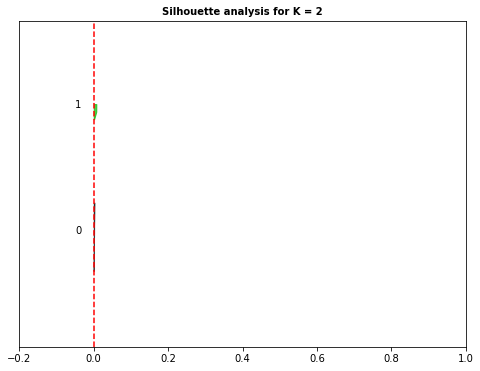

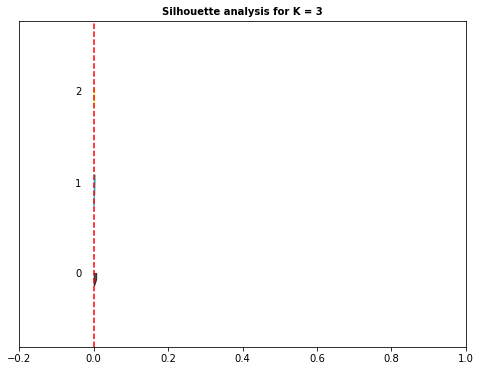

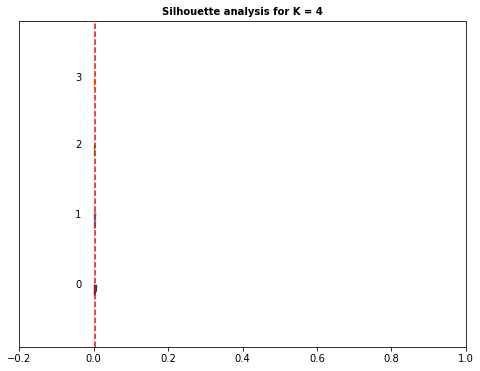

In [111]:
silhouette(kmeans_results, final_df, plot=True)

In [112]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = vectorizer.get_feature_names()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs

def plotWords(dfs, n_feats):
    plt.figure(figsize=(8, 4))
    for i in range(0, len(dfs)):
        plt.title(("Most Common Words in Cluster {}".format(i)), fontsize=10, fontweight='bold')
        sns.barplot(x = 'score' , y = 'features', orient = 'h' , data = dfs[i][:n_feats])
        plt.show()

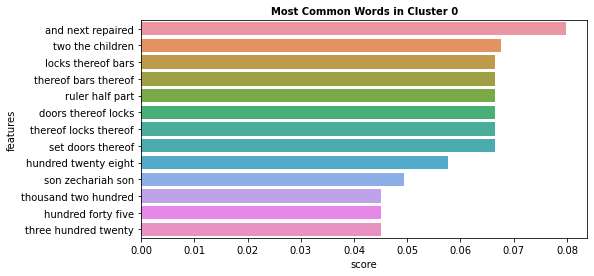

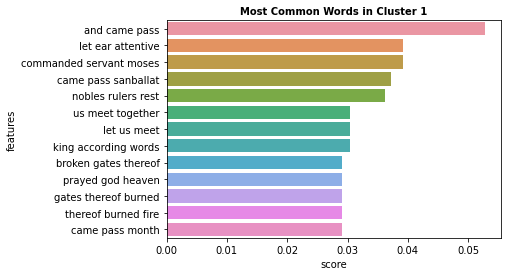

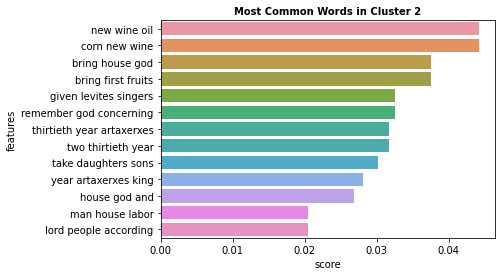

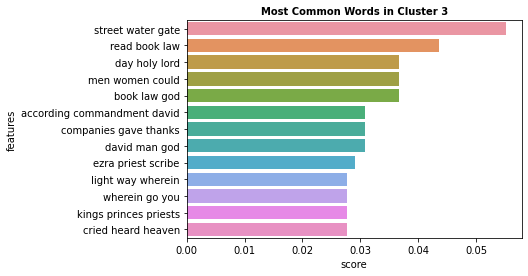

In [113]:
best_result = 4
kmeans = kmeans_results.get(best_result)

final_df_array = final_df.to_numpy()
prediction = kmeans.predict(final_df)
n_feats = 20
dfs = get_top_features_cluster(final_df_array, prediction, n_feats)
plotWords(dfs, 13)

In [114]:
def centroidsDict(centroids, index):
    a = centroids.T[index].sort_values(ascending = False).reset_index().values
    centroid_dict = dict()

    for i in range(0, len(a)):
        centroid_dict.update( {a[i,0] : a[i,1]} )

    return centroid_dict

def generateWordClouds(centroids):
    wordcloud = WordCloud(max_font_size=100, background_color = 'white')
    for i in range(0, len(centroids)):
        centroid_dict = centroidsDict(centroids, i)        
        wordcloud.generate_from_frequencies(centroid_dict)

        plt.figure()
        plt.title('Cluster {}'.format(i))
        plt.imshow(wordcloud)
        plt.axis("off")
        plt.show()

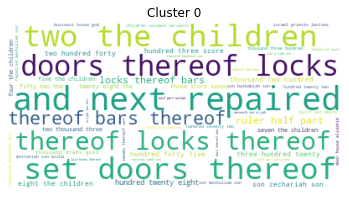

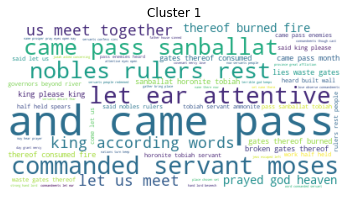

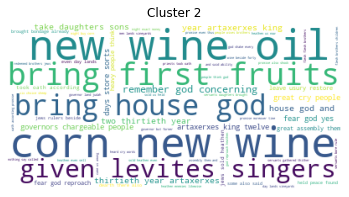

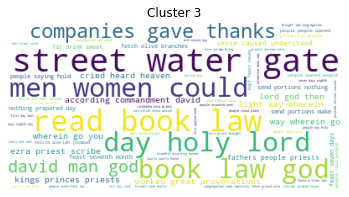

In [115]:
centroids = pd.DataFrame(kmeans.cluster_centers_)
centroids.columns = final_df.columns
generateWordClouds(centroids)

In [116]:
labels = kmeans.labels_ 
df['label'] = labels
df.head()

,Autor,Livro,label
100,Neemias_1,"'words', 'nehemiah', 'son', 'hachaliah', '.', ...",1
101,Neemias_2,"'came', 'pass', 'month', 'nisan', ',', 'twenti...",1
102,Neemias_3,"'eliashib', 'high', 'priest', 'rose', 'brother...",0
103,Neemias_4,"'came', 'pass', ',', 'sanballat', 'heard', 'bu...",1
104,Neemias_5,"'great', 'cry', 'people', 'wives', 'brothers',...",2


In [117]:
print(df)

          Autor                                              Livro  label
100   Neemias_1  'words', 'nehemiah', 'son', 'hachaliah', '.', ...      1
101   Neemias_2  'came', 'pass', 'month', 'nisan', ',', 'twenti...      1
102   Neemias_3  'eliashib', 'high', 'priest', 'rose', 'brother...      0
103   Neemias_4  'came', 'pass', ',', 'sanballat', 'heard', 'bu...      1
104   Neemias_5  'great', 'cry', 'people', 'wives', 'brothers',...      2
105   Neemias_6  'came', 'pass', 'sanballat', ',', 'tobiah', ',...      1
106   Neemias_7  'came', 'pass', ',', 'wall', 'built', ',', 'se...      0
107   Neemias_8  'people', 'gathered', 'together', 'one', 'man'...      3
108   Neemias_9  'twenty', 'fourth', 'day', 'month', 'children'...      3
109  Neemias_10  'sealed', ',', 'nehemiah', ',', 'tirshatha', '...      2
110  Neemias_11  'rulers', 'people', 'dwelled', 'jerusalem', ':...      0
111  Neemias_12  'priests', 'levites', 'went', 'zerubbabel', 's...      3
112  Neemias_13  'day', 'read', 'book'